# Сборный проект: "Анализ закономерностей успешности компьютерных игр"

Я работаю в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Описание данных:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

План действий:

1) Подготовим данные:

- Рассмотрим пропуски, дупликаты, названия столбцов и т.д.

2) Проведем исследовательский анализ данных:

- Изучим количество выпущенных игр по годам.
- Проанализируем продажи по платформам и определим актуальный период.
- Построим "ящик с усами" для глобальных продаж игр по платформам.
- Исследуем влияние отзывов пользователей и критиков на продажи.

3) Составим портрет пользователя каждого региона:

- Определим популярные платформы и жанры для каждого региона.
- Исследуем влияние рейтинга ESRB на продажи в разных регионах.

4) Проверим гипотезы:

- Сформулируем и проверим гипотезы о равенстве пользовательских рейтингов для разных платформ и жанров.

5) Напишем общий вывод:

- Сделаем обобщение результатов анализа и предложите рекомендации для планирования рекламных кампаний и выбора потенциально успешных игр на 2017 год.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

#### Шаг 1. Загрузка данных

Загрузим файл с данными и изучим общую информацию

In [2]:
data_games = pd.read_csv('C:\\Users\\User\\OneDrive\\Desktop\\da_practicum\\CSV\\project_4\\games.csv')

In [3]:
def data_first_view(data):
    # Вывод первых 10 строк
    print("Первые 10 строк данных:")
    display(data.head(10))
    print('*' * 50)
    
    # Информация о данных
    print("\nИнформация о данных:")
    display(data.info())
    print('*' * 50)
    
    # Имена столбцов
    print("\nИмена столбцов:")
    display(data.columns)
    print('*' * 50)
    
    # Описательная статистика
    print("\nОписательная статистика:")
    display(data.describe())
    print('*' * 50)
    
    # Количество пропущенных значений
    print("\nКоличество пропущенных значений в каждом столбце:")
    display(data.isna().sum())
    print('*' * 50)
    
    # Количество дубликатов
    print("\nКоличество дубликатов:")
    display(data.duplicated().sum())

In [4]:
data_first_view(data_games)

Первые 10 строк данных:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**************************************************

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

**************************************************

Имена столбцов:


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

**************************************************

Описательная статистика:


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**************************************************

Количество пропущенных значений в каждом столбце:


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**************************************************

Количество дубликатов:


0

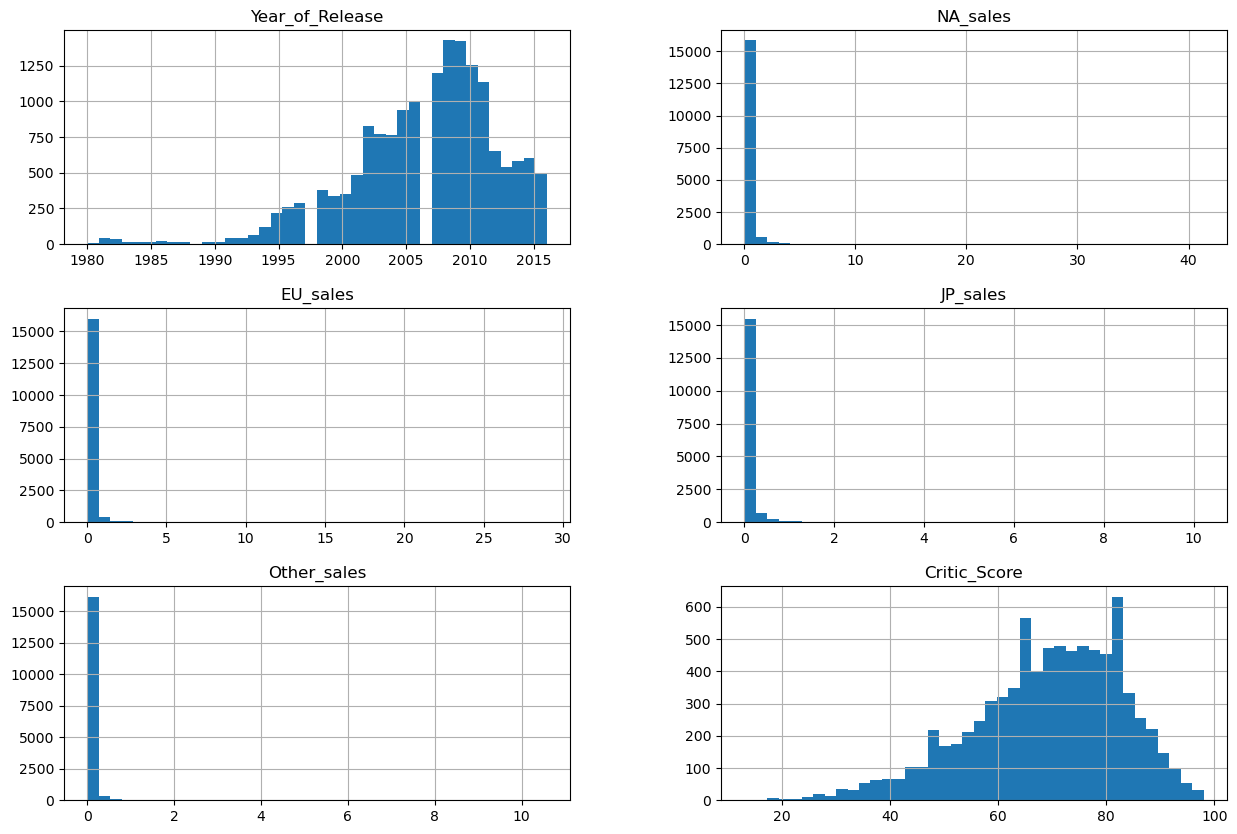

In [5]:
data_games.hist(bins=40, figsize=(15, 10))
plt.show()

In [6]:
fist_len = len(data_games)

**Вывод по шагу 1**

Таблица содержит 16715 записей. При первичной обработке были выявлены моменты, на которые стоит обратить внимание при предобработке данных:

- Неверно указан тип данных у столбца Year_of_Release (нужно привести к int), User_Score (должен быть тип float, однако надо разбираться с тем, что такое "tbd".


- Нужно изменить названия столбцов, а именно привести к нижнему регистру


- Имеются пропуски в столбцах name, Year_of_Release, Critic_Score, User_Score, Rating

#### Шаг 2. Предобработка данных

Нам этом шаге нам необходимо выполнить следующие действия:


- Заменим названия столбцов (приведем к нижнему регистру);


- Подробнее рассмотрим пропуски и обработаем их при необходимости


- Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберем это значение и опишим, как его обработать;


- Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;


- Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [7]:
def missing_percentage(data_isna, len_data):
    percentage_missing = (data_isna / len(len_data)) * 100
    return f"Процент пропусков в столбце: {percentage_missing:.2f}%"

##### Изменение названия столбцов

In [8]:
data_games.columns = data_games.columns.str.lower()

In [9]:
data_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Названия столбцов были успешно изменены, путем приведения их к нижнему регистру.

##### Обработка пропусков

###### Столбцы name и genre

In [10]:
data_games[data_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
data_games[data_games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видим, что пропуски в столбцах **name** и **genre** принадлежат строкам 659 и 14244, их всего две, поэтому удалим просто удалим пропуски в них.

In [12]:
data_games = data_games.dropna(subset=['name', 'genre']).reset_index(drop=True)

In [13]:
data_games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

###### Столбец year_of_release

In [14]:
data_games[data_games['year_of_release'].isna()].head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
718,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
804,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


In [15]:
data_games[data_games['year_of_release'].isna()].tail(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15814,Without Warning,XB,NaN,Shooter,0.01,0.00,0.00,0.0,45.0,2,M
15951,PDC World Championship Darts 2008,DS,NaN,Sports,0.01,0.00,0.00,0.0,NaN,NaN,NaN
15964,Dinotopia: The Sunstone Odyssey,GC,NaN,Action,0.01,0.00,0.00,0.0,50.0,tbd,T
15996,Jet Impulse,DS,NaN,Simulation,0.00,0.00,0.02,0.0,NaN,NaN,NaN
16015,Dream Dancer,DS,NaN,Misc,0.01,0.00,0.00,0.0,NaN,tbd,E
16057,Dance! It's Your Stage,Wii,NaN,Misc,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16077,Football Manager 2007,X360,NaN,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16078,Ferrari: The Race Experience,Wii,NaN,Racing,0.00,0.01,0.00,0.0,54.0,NaN,E
16155,Aquaman: Battle for Atlantis,XB,NaN,Action,0.01,0.00,0.00,0.0,26.0,2.7,T
16178,WRC: FIA World Rally Championship,PC,NaN,Racing,0.00,0.01,0.00,0.0,65.0,NaN,RP


In [16]:
missing_percentage(data_games['year_of_release'].isna().sum(), data_games)

'Процент пропусков в столбце: 1.61%'

В данном случае процент пропусков составляет 1.61%, также из представленных выше таблиц можем увидеть, что игры, у которых пропущен год релиза, выпущены в период с 2000 по 2010, также есть год релиза в названиях, в оснвном характерно играм жанра спорт.

Я считаю, что в этом случае можем удалить пропуски, так как их не очень много.

In [17]:
data_games = data_games.dropna(subset=['year_of_release']).reset_index(drop=True)

In [18]:
data_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

###### Столбец user_score

In [19]:
data_games['user_score'].head(10)

0      8
1    NaN
2    8.3
3      8
4    NaN
5    NaN
6    8.5
7    6.6
8    8.4
9    NaN
Name: user_score, dtype: object

In [20]:
data_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [21]:
missing_percentage(data_games['user_score'].isna().sum(), data_games)

'Процент пропусков в столбце: 40.17%'

Видим большое количество пропусков в данном столбце, но заполнять их средним или медианой считаю некорректным, так как может сильно исказиться общая картина данных, поэтому попробуем оставить их. Также рассмотрим, что такое **tbd**.

Аббревиатура "TBD" расшифровывается как "To Be Determined" или "Будет определено". Обычно ее используют, когда конкретная оценка или значение еще не установлены или ожидают уточнения. Это может быть из-за различных причин, например, если пользователь еще не предоставил свою оценку или если оценка не была рассчитана из-за отсутствия достаточного количества данных.

Поэтому заменим и **tbd** на Nan

In [22]:
data_games['user_score'] = data_games['user_score'].replace('tbd', np.NaN)

In [23]:
data_games['user_score']

0          8
1        NaN
2        8.3
3          8
4        NaN
        ... 
16439    NaN
16440    NaN
16441    NaN
16442    NaN
16443    NaN
Name: user_score, Length: 16444, dtype: object

###### Солбец critic_score

In [24]:
missing_percentage(data_games['critic_score'].isna().sum(), data_games)


'Процент пропусков в столбце: 51.45%'

В данном столбце довольно большое количество пропусков, поэтому считаю, что нужно поступить как и со столбцом **user_score**, то есть оставить пропуски, чтобы можно было и дальше проводить вычислительные операции.

In [25]:
data_games['critic_score'].head(30)

0     76.0
1      NaN
2     82.0
3     80.0
4      NaN
5      NaN
6     89.0
7     58.0
8     87.0
9      NaN
10     NaN
11    91.0
12     NaN
13    80.0
14    61.0
15    80.0
16    97.0
17    95.0
18     NaN
19    77.0
20     NaN
21     NaN
22     NaN
23    97.0
24    95.0
25     NaN
26    77.0
27     NaN
28    95.0
29    88.0
Name: critic_score, dtype: float64

###### Столбец rating

In [26]:
missing_percentage(data_games['rating'].isna().sum(), data_games)

'Процент пропусков в столбце: 40.60%'

Процент пропусков в данном столбце тоже очень велик, но заполнять их тяжело, так как они представлены типом object, возможно стоит посмотреть, что обозначает каждая буква.

ESRB означает Совет по рейтингу развлекательного программного обеспечения. Это организация, которая присваивает рейтинги видеоиграм в Северной и Центральной Америке.

- E - Все
- Е 10+ – Все в возрасте 10+
- T - подросток
- M – Зрелые (17+)
- A – Взрослый (только 18+)
- RP - Ожидается рейтинг

В этом случае можно заполнить значения **RP**, как было со столбцом **user_score** в случае с **tbd**

In [27]:
data_games['rating'] = data_games['rating'].fillna('RP')

In [28]:
data_games['rating']

0         E
1        RP
2         E
3         E
4        RP
         ..
16439    RP
16440    RP
16441    RP
16442    RP
16443    RP
Name: rating, Length: 16444, dtype: object

##### Преобразование данных в нужные типы

Нам необходимо преобразовать столбцы **year_of_release** - к типу int, так как год является целочым числом, и **user_score** - к типу float.

In [29]:
data_games['year_of_release'] = data_games['year_of_release'].astype(int)

In [30]:
data_games['user_score'] = data_games['user_score'].astype(float)

In [31]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


##### Суммарные продажи во всех регионах.

Добавим столбец, который содержит в себе сумарные продажи во всех регионах. Его мы получим путем сложения столбцов, которые содержат информацию о продажах в Северной Америке, в Европе, в Японии, в других странах (миллионы проданных копий).

In [32]:
data_games['total_sales'] = data_games['na_sales'] + data_games['eu_sales'] + data_games['jp_sales'] + data_games['other_sales']

In [33]:
data_games['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16439     0.01
16440     0.01
16441     0.01
16442     0.01
16443     0.01
Name: total_sales, Length: 16444, dtype: float64

##### Дупликаты

In [34]:
data_games.duplicated().sum()

0

In [35]:
implicit_duplicates = data_games.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)
if implicit_duplicates.any():
    print("Количество неявных дубликатов (по названию, платформе и году релиза):")
    display(implicit_duplicates.sum())
else:
    print("Не найдено неявных дубликатов (по названию, платформе и году релиза).")


Количество неявных дубликатов (по названию, платформе и году релиза):


2

In [36]:
display(data_games[implicit_duplicates])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


В нашем случае явных дубликатов не представлено, однако есть 2 строки, которые являются неявными дуплкатами. Удалим строку 15969.

In [37]:
data_games.drop(index=15969, inplace=True)

**Промежуточный вывод по шагу 2**

Во время предобработки данных было сделано следующее:

1) Для удобства работы с датафреймом были изменены названия столбцов, путем приведения их к нижнему регистру.


2) Там, где это возможно были обработаны пропуски:


- Пропуски в столбцах name и genre были удалены, так как они принадлежат одним и тем строкам, к тому же их было всего 2 в каждом столбце.

- Пропуски в столбце year_of_release были удалены, так как их доля равна всего 1.61%, также было замечено, что игры, у которых пропущен год релиза, выпущены в период с 2000 по 2010, также есть год релиза в названиях, в оснвном характерно играм жанра спорт.

- Рассматривая столбец user_score мы увдели большое количество пропусков, но заполнять их средним или медианой я посчитал некорректным, так как может сильно исказиться общая картина данных. Также было рассмотрено, что такое tbd. Аббревиатура "TBD" расшифровывается как "To Be Determined" или "Будет определено". Обычно ее используют, когда конкретная оценка или значение еще не установлены или ожидают уточнения. Это может быть из-за различных причин, например, если пользователь еще не предоставил свою оценку или если оценка не была рассчитана из-за отсутствия достаточного количества данных. Поэтому заменил и tbd на Nan

- В столбце critic_score довольно большое количество пропусков, поэтому считаю, что нужно поступить как и со столбцом user_score, то есть оставить пропуски, чтобы можно было и дальше проводить вычислительные операции.

- Процент пропусков в столбце rating тоже очень велик, но заполнять их тяжело, так как они представлены типом object, поэтому было изучено, что обозначает каждая аббревиатура в рейтинге ESRB. В этом случае можно появилось предложение заполнить пропущенные значения RP, как было со столбцом user_score в случае с tbd.


3) Затем было выполнено преобразование типов данных у двух столбцов 


-  year_of_release - к типу int, так как год является целочым числом

- user_score - к типу float.

4) Был добавлен столбец, который содержит в себе сумарные продажи во всех регионах. 

- Его мы получим путем сложения столбцов, которые содержат информацию о продажах в Северной Америке, в Европе, в Японии, в других странах (миллионы проданных копий).

5) Выполнена проверка на явные дупликаты.

- Результат показал, что в нашем датафрейме явных дупликатов нет, однако, есть невные дупликаты (по названию, платформе и году релиза одновременно). 

#### Шаг 3. Исследовательский анализ

- Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?


- Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?


- Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.



- Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.


- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.


- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.



- Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

##### Количество игр, выпускаемых в разные годы

In [38]:
pivot_years = data_games.pivot_table(index='year_of_release', values='name', aggfunc='count')

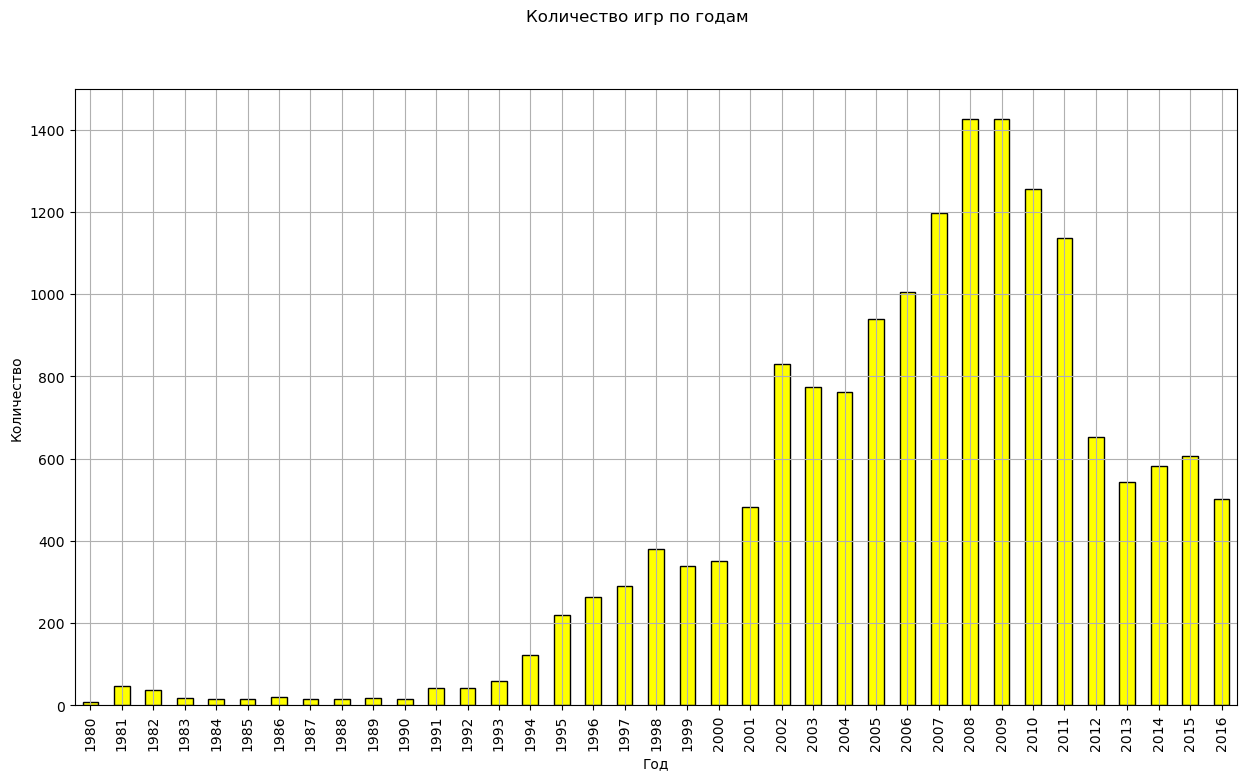

In [39]:
pivot_years.plot(kind='bar', color='yellow', edgecolor='black', figsize=(15, 8), legend=False)

plt.suptitle('Количество игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.grid(True)

plt.show()

Из полученного графика видим, что количество игр до 1991 года крайне мало, но затем мы видим резкий рост.Так как 1990-е годы были ознаменованы заметными инновациями в компьютерных играх. Основными достижениями называют переход от растровой графики к полностью полигональному 3D, снижение популярности аркадных игр и появление нескольких новых жанров - шутер от первого лица, стратегия в реальном времени и MMO.


Также мы видим, что стремительное развитие продолжается до 2009 года, возможно, в этот период производители игр решили развиваться на рынке телефонных игр. Если рассамтривать некую игровую историю, то как раз 2009 год был ознаменован эрой магазинов приложений, вот к примеру игры, которые набрали огромную популярность: Doodle Jump и Angry Birds.

##### Изменение продаж по платформам

In [40]:
pivot_platform_sales = data_games.pivot_table(index='platform', values='total_sales', aggfunc='sum').\
sort_values(by='total_sales', ascending=False)

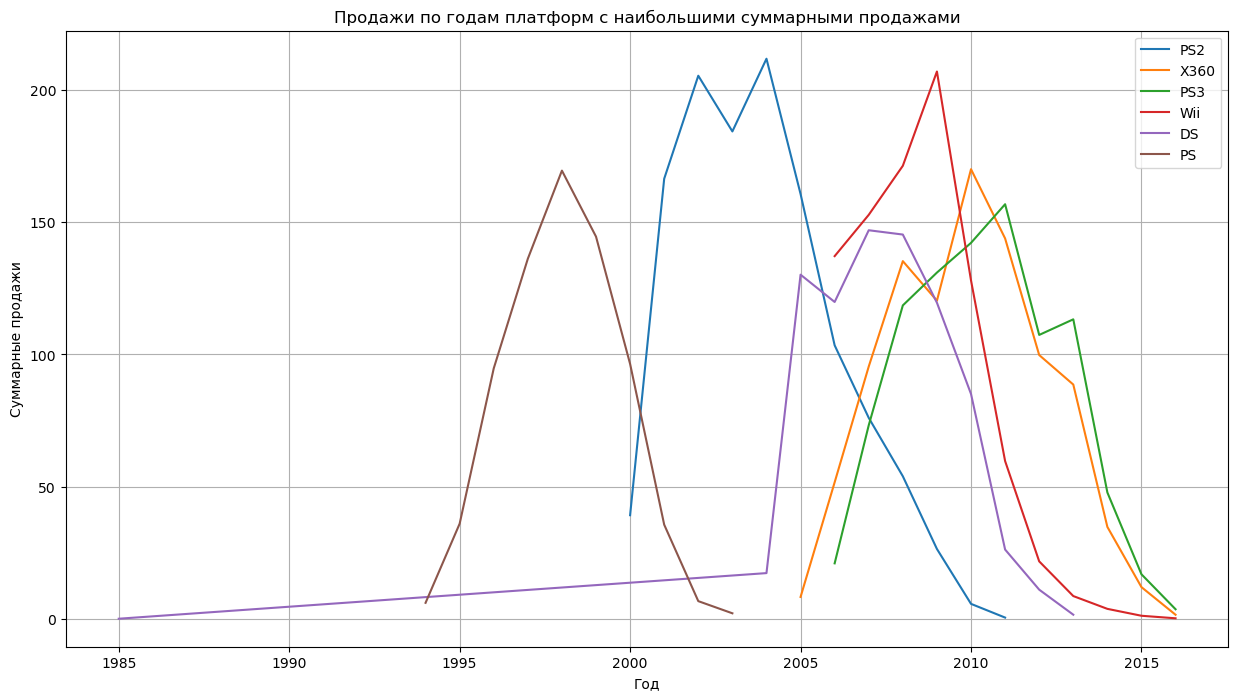

In [41]:
top_platforms = pivot_platform_sales.head(6).index

# Создаем график для каждой платформы
plt.figure(figsize=(15, 8))
for platform in top_platforms:
    platform_data = data_games[data_games['platform'] == platform]
    pivot_years = platform_data.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    plt.plot(pivot_years, label=platform)


plt.title('Продажи по годам платформ с наибольшими суммарными продажами')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.legend()
plt.grid(True)

plt.show()

Видим, что данные о продажах платформы DS мы получаем с 1985 года, но сама консоль была выпущена тольок в 2004 году.

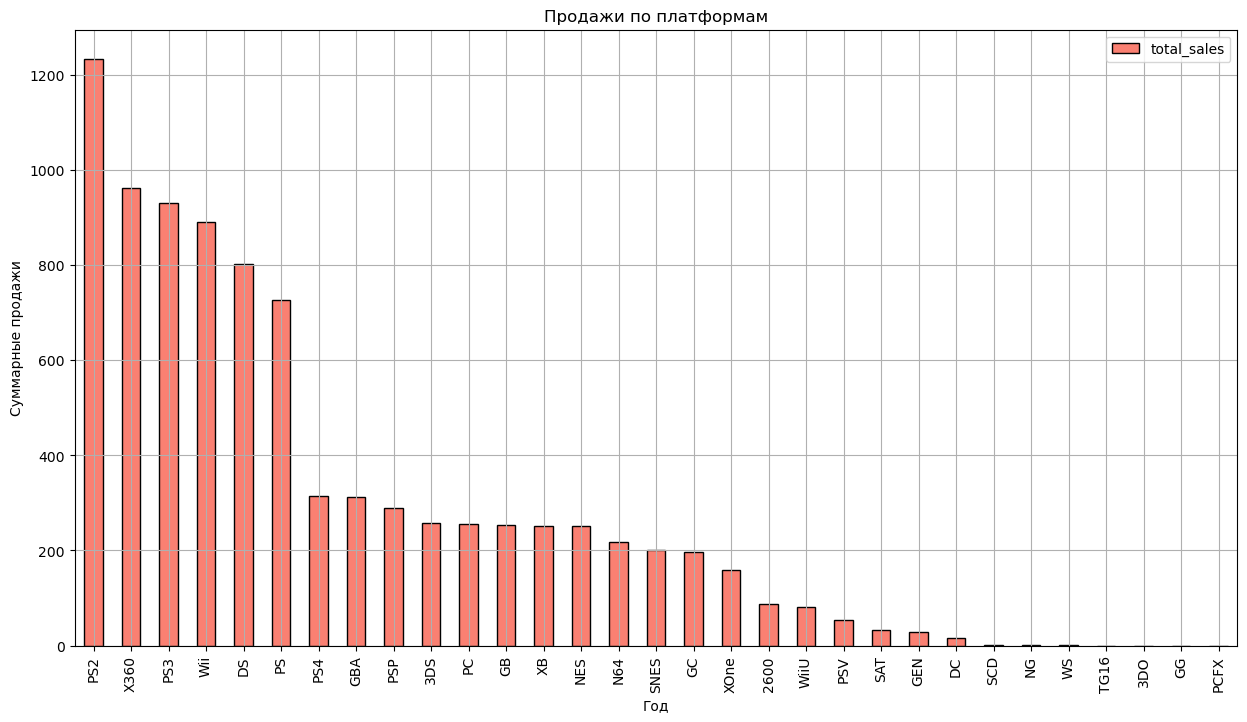

In [42]:
pivot_platform_sales.plot(kind='bar', color='salmon', edgecolor='black', figsize=(15, 8), legend=False)

plt.title('Продажи по платформам')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.legend()
plt.grid(True)

plt.show()

Из представленных графиков можем сделать о том, что наибольшими продажами обладают PS2, X360, PS3, Wii, DS, PS, что вполне логично, потому что многие из них стали "легендарными" в геймерском комьюнити. 

Если рассамтривать продажи по годам, то видим, что самая долговечная платформа - это DS. Также видим, что пик продаж приходится где-то спустя 3-5 лет после выпуска платформы, затем он снижается, если смотреть на PS, то после выхода новой модели данной консоли происходит спад.

Также можно заметить тенденцию, что в среднем новая платформа выходит каждые 5 лет. А срок её жизни составляет примерно 10 лет.

##### Выбор актуального периода

Отталкиваясь от продолжительности жизни платформы, считаю, что нужно выбрать период с 2014 по 2016 год.За этот период можно посмотреть динамику жизни как новых платформ, так и популярных, но уже изживающих себя платформ. 

In [44]:
data_games_actual = data_games[data_games['year_of_release'] >= 2014]

In [45]:
data_games_actual['year_of_release'].unique()

array([2015, 2014, 2016])

In [46]:
actual_pivot = data_games_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum')

In [47]:
actual_pivot.sort_values('total_sales', ascending=False)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


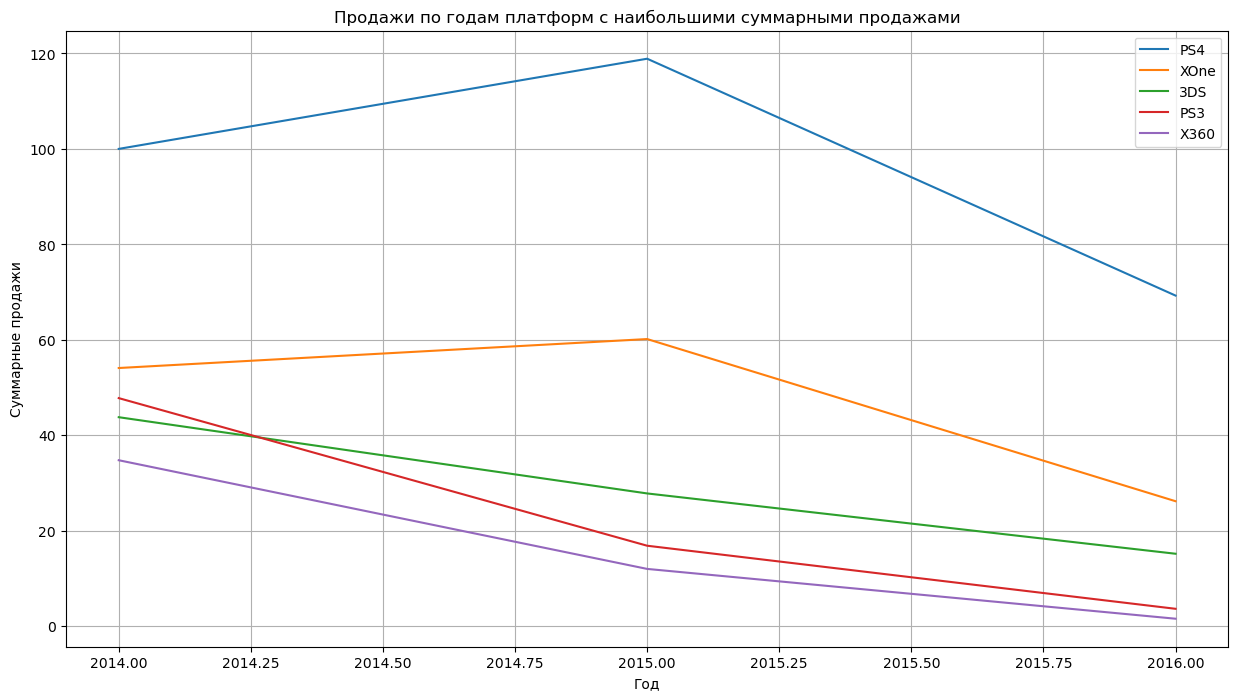

In [48]:
actual_top = actual_pivot.sort_values('total_sales', ascending=False).head(5).index

# Создаем график для каждой платформы
plt.figure(figsize=(15, 8))
for platform in actual_top:
    platform_data = data_games_actual[data_games_actual['platform'] == platform]
    pivot_years = platform_data.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    plt.plot(pivot_years, label=platform)


plt.title('Продажи по годам платформ с наибольшими суммарными продажами')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.legend()
plt.grid(True)

plt.show()

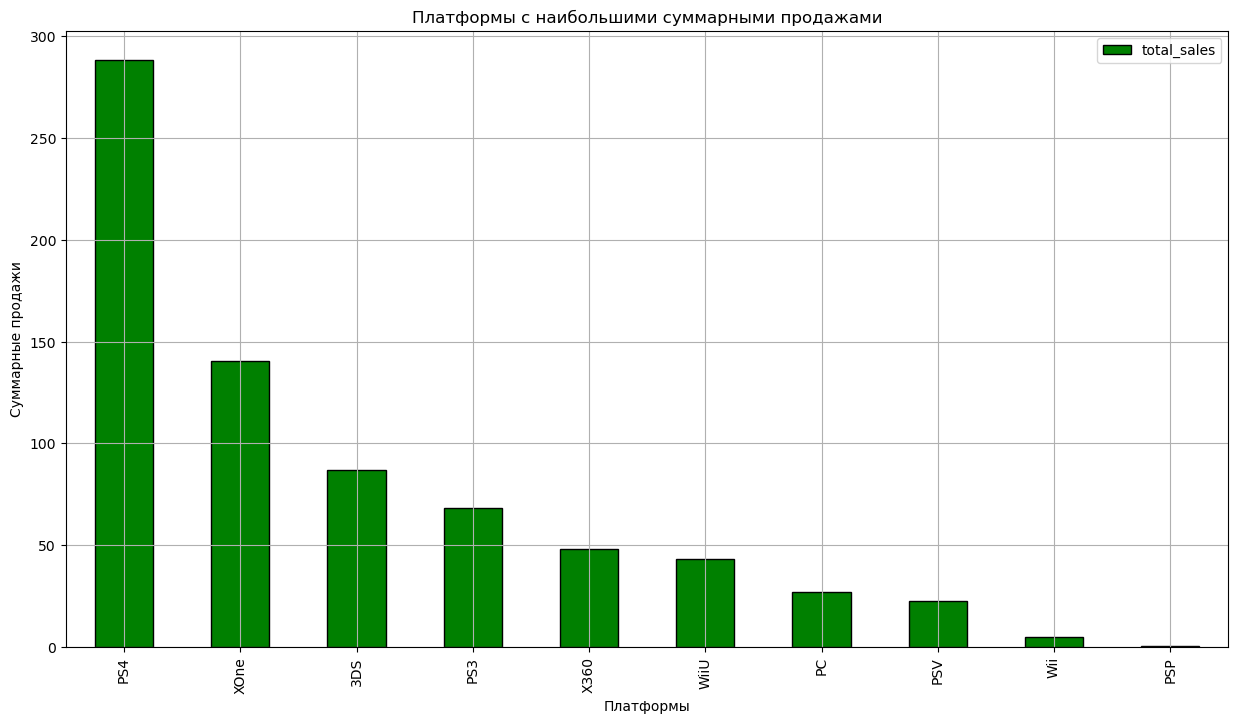

In [49]:
actual_pivot.sort_values('total_sales', ascending=False).plot(kind='bar', figsize=(15, 8), 
                                                              grid=True, color='green', edgecolor='black')

plt.title('Платформы с наибольшими суммарными продажами')
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи')
plt.legend()
plt.grid(True)

plt.show()

При анализе периода с 2014 по 2016 год видим, что в топ 5 входят следующие платформы:

- PS4

- XOne

- 3DS

- PS3

- X360

Видим, что безоговорочным лидером является PlayStation, в топ 5 вошли сразу две игровые консоли: PS4 (1 место), так как это одна из самых новых и технологичных консолей и PS3 (4 место), жизнь которой уже заканчивается. Также в топ 5 вошли две консоли от Xbox: XOne (2 место), которая является основным конкурентом для PS4, X360 (5 место), жизненный цикл которой тоже заканчивается как и у PS3. 3 место занимает 3DS, которая была выпущена ещё в 2011 году.


##### Ящик с усами

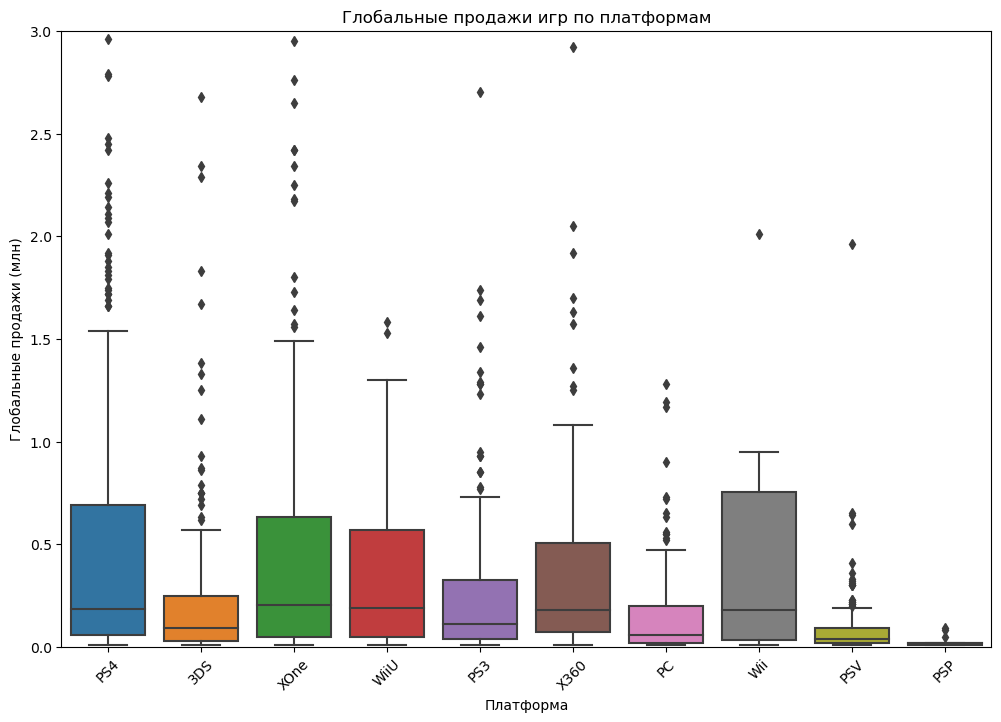

In [50]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='total_sales', data=data_games_actual)
plt.title('Глобальные продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (млн)')
plt.xticks(rotation=45)
plt.ylim(0, 3)


plt.show()

Анализируя полученный график, можем сделать следующие выводы:

- Данные хаотичны, с большим количеством выбросов: "ящик с усами" показывает значительный разброс в продажах игр для различных платформ. Это указывает на то, что игровой рынок довольно динамичен и подвержен влиянию различных факторов, таких как популярность игр или рекламные кампании.


- Главные конкуренты: Playstation и Xbox выделяются на графике как основные конкуренты на игровом рынке. Они имеют сравнимые уровни продаж и, вероятно, являются основными выборами для игроков.


-  Для крупных платформ, таких как Xbox (X360) и Playstation 4 (PS4), верхняя граница продаж находится примерно на уровне 1.7 миллиона. Это может указывать на примерный максимальный уровень коммерческого успеха для игр на этих платформах.


- Самая неприбыльная платформа - PSP. Это может указывать на её низкую популярность и невысокие коммерческие показатели.


- Медианное значение продаж для крупных платформ составляет около 0.2 миллиона. Это может быть полезной метрикой для прогнозирования ожидаемых продаж новых игр на этих платформах.


- Малые платформы, хотя и имеют меньший объем продаж, обычно характеризуются более стабильным распределением продаж и меньшим количеством выбросов. Это может сделать их менее рискованным выбором для разработчиков игр, но и менее привлекательным для крупных издателей.


##### Влияние отзывов пользователей и критиков на продажи

Посмотрим, как влияют на продажи внутри одной популярной платформы, а именно **X360**, отзывы пользователей и критиков. Выбор пал на данную платформу, потому что она одна из самых популярных платформ и довольно давно на рынке.

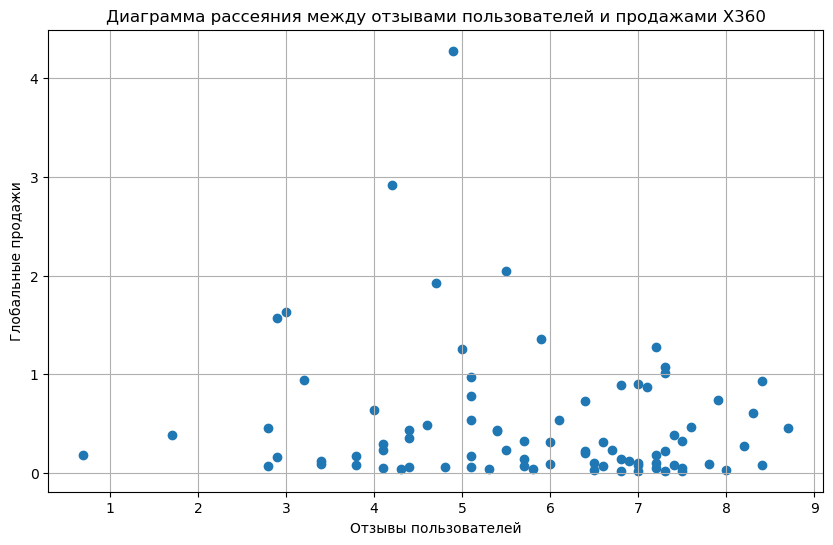

Корреляция между отзывами пользователей и продажами X360: -0.138444570945665


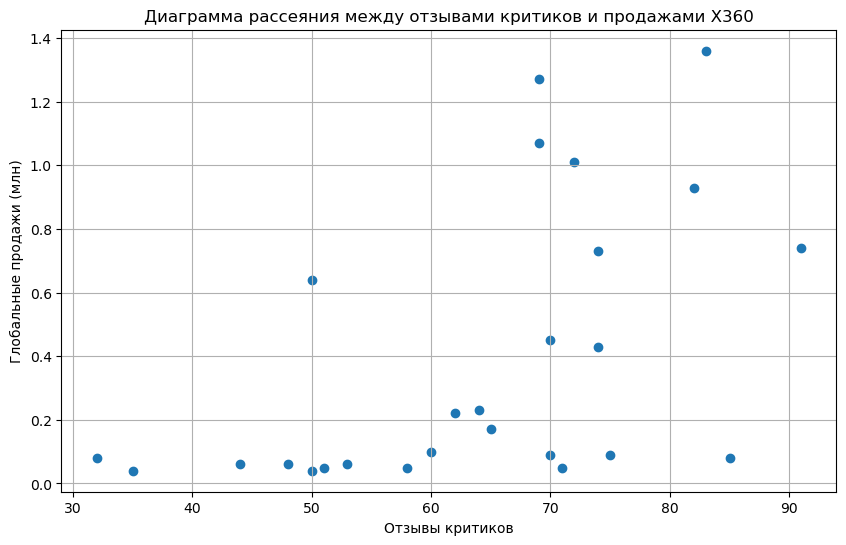

Корреляция между отзывами критиков и продажами X360: 0.5257228356581523


In [51]:
x360_data = data_games_actual[data_games_actual['platform'] == 'X360'] # отфильтруем данные по нашей платформе


plt.figure(figsize=(10, 6))
plt.scatter(x360_data['user_score'], x360_data['total_sales'])
plt.title('Диаграмма рассеяния между отзывами пользователей и продажами X360')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Глобальные продажи')
plt.grid(True)
plt.show()


correlation_user_sales = x360_data['user_score'].corr(x360_data['total_sales']) # вычисление корреляции
print("Корреляция между отзывами пользователей и продажами X360:", correlation_user_sales)


plt.figure(figsize=(10, 6))
plt.scatter(x360_data['critic_score'], x360_data['total_sales'])
plt.title('Диаграмма рассеяния между отзывами критиков и продажами X360')
plt.xlabel('Отзывы критиков')
plt.ylabel('Глобальные продажи (млн)')
plt.grid(True)
plt.show()


correlation_critic_sales = x360_data['critic_score'].corr(x360_data['total_sales'])
print("Корреляция между отзывами критиков и продажами X360:", correlation_critic_sales)

Исходя из значений корреляции между отзывами пользователей и продажами (-0.138) и между отзывами критиков и продажами (0.525) для Xbox 360 (X360), можно сделать следующие выводы:


- Отзывы критиков имеют более сильную корреляцию с продажами, чем отзывы пользователей. Значение корреляции между отзывами критиков и продажами (0.525) гораздо выше, чем корреляция между отзывами пользователей и продажами (-0.138). Это может указывать на то, что мнение критиков о игре более существенно влияет на решение покупателей о покупке, чем мнение пользователей.

- Отзывы критиков имеют заметную корреляцию с продажами. Значение корреляции между отзывами критиков и продажами (0.525) говорит о том, что высокие оценки от критиков могут стимулировать продажи игр. Это подтверждает важность влияния мнения профессиональных экспертов на решение покупателей.

- Корреляция между отзывами пользователей и продажами (-0.138) остается невысокой и может свидетельствовать о более слабой связи между мнением пользователей и успешностью продаж. Возможно, другие факторы, такие как рекламные кампании или репутация разработчика, играют более значимую роль в привлечении пользователей к покупке игры. 

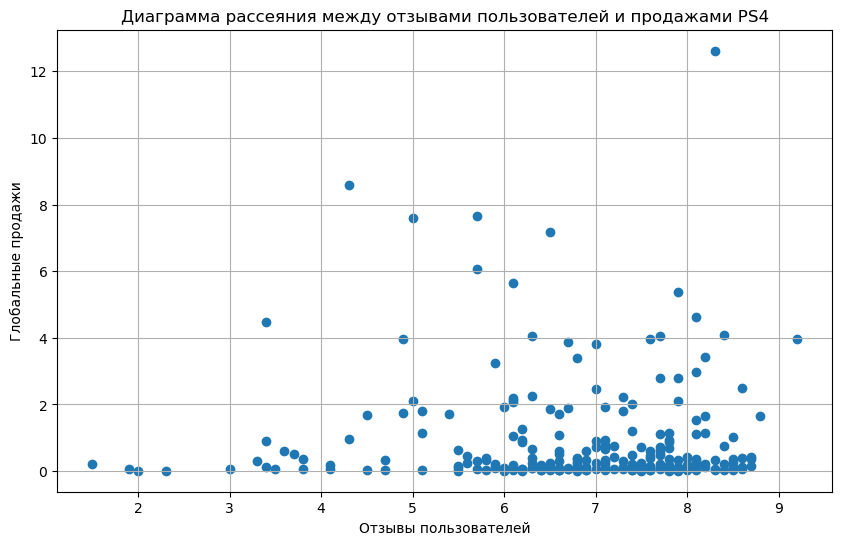

Корреляция между отзывами пользователей и продажами PS4: -0.040131589472697356


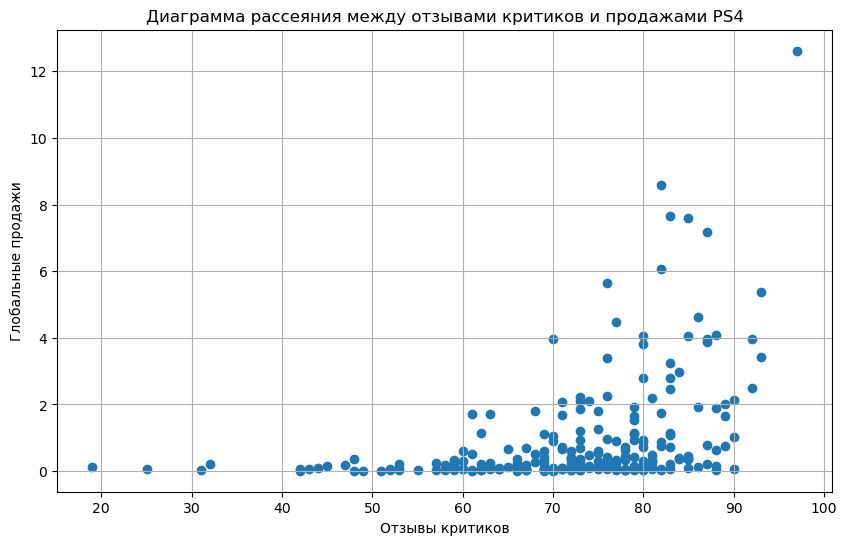

Корреляция между отзывами критиков и продажами PS4: 0.40266141068104083


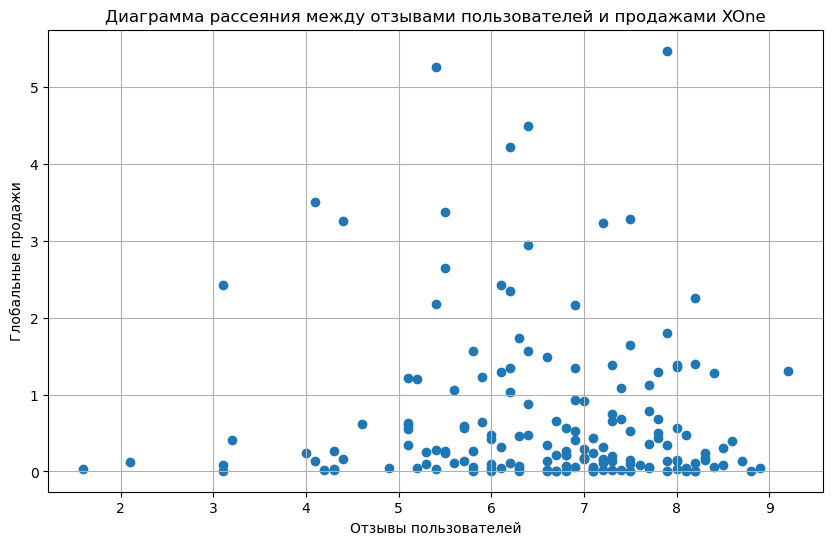

Корреляция между отзывами пользователей и продажами XOne: -0.0703839280647581


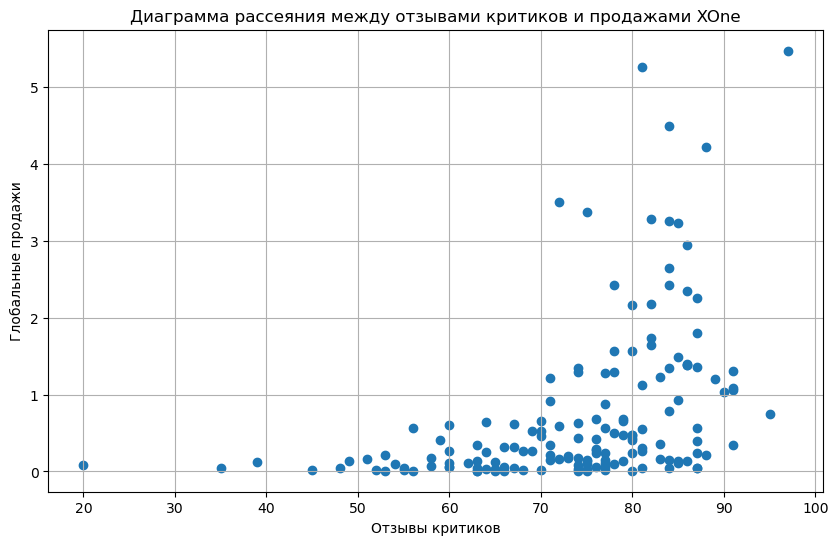

Корреляция между отзывами критиков и продажами XOne: 0.42867694370333226


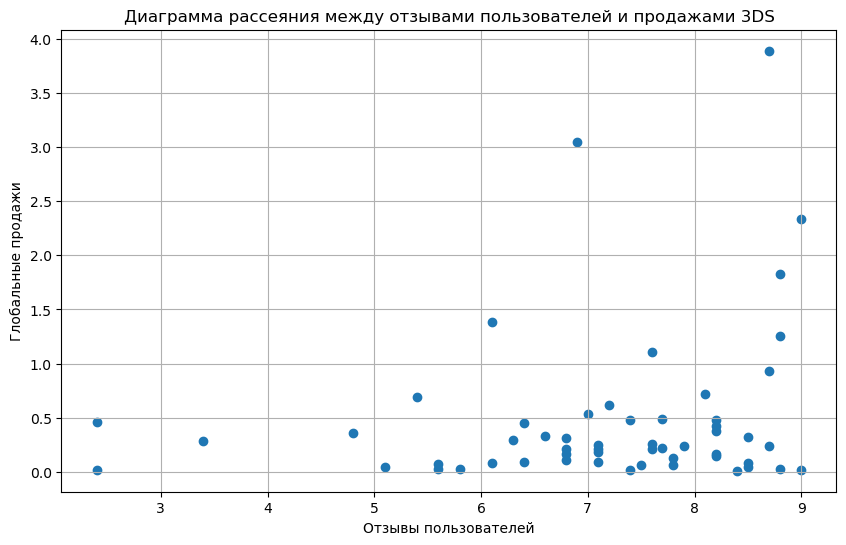

Корреляция между отзывами пользователей и продажами 3DS: 0.2151932718527028


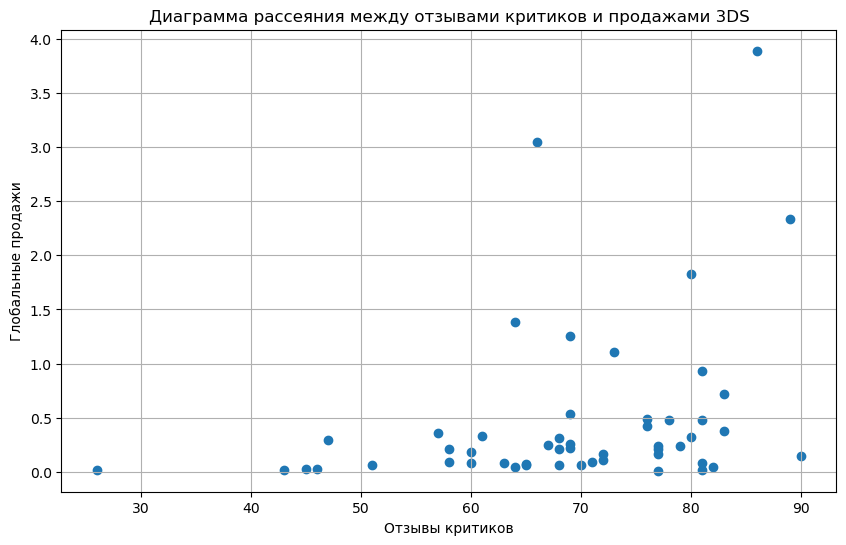

Корреляция между отзывами критиков и продажами 3DS: 0.314117492869051


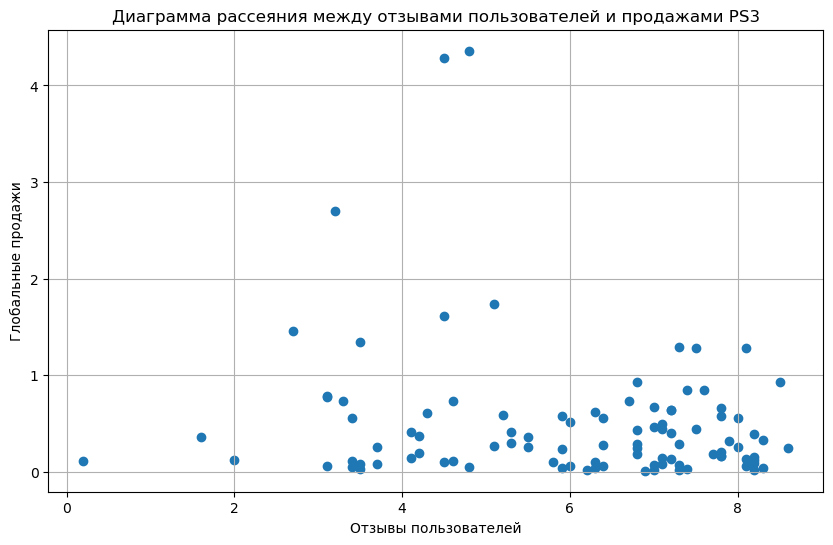

Корреляция между отзывами пользователей и продажами PS3: -0.16676141347662118


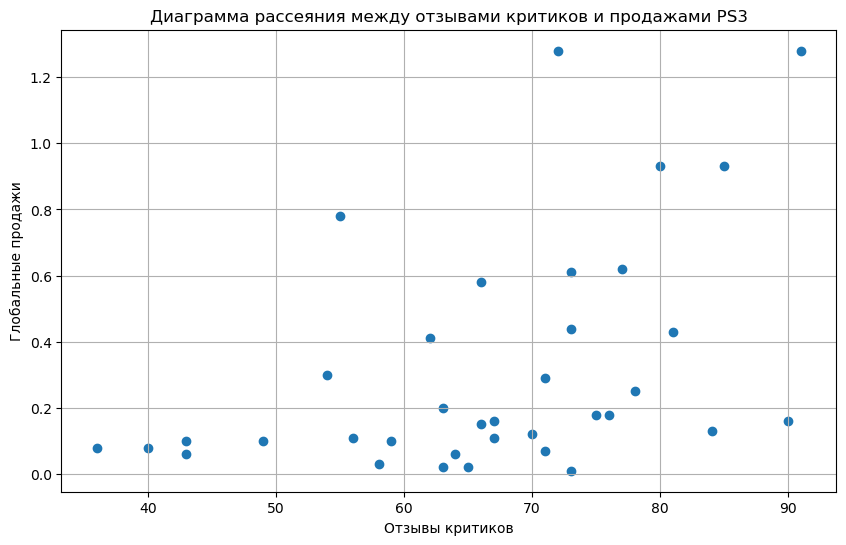

Корреляция между отзывами критиков и продажами PS3: 0.44657460493190704


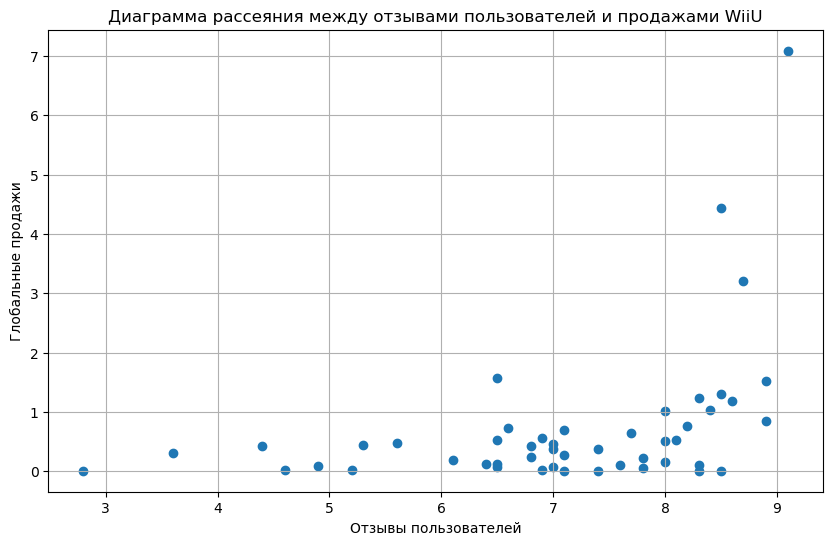

Корреляция между отзывами пользователей и продажами WiiU: 0.40792645792170773


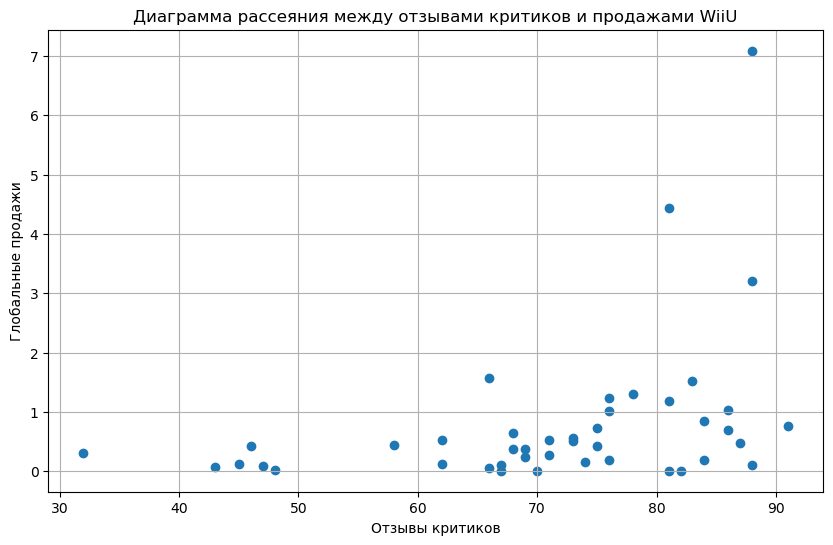

Корреляция между отзывами критиков и продажами WiiU: 0.370201412480884


In [52]:
top_platforms = ['PS4', 'XOne', '3DS', 'PS3', 'WiiU'] # создадим топ 5 компаний


for platform in top_platforms:
    platform_data = data_games_actual[data_games_actual['platform'] == platform]
    
    
    plt.figure(figsize=(10, 6))
    plt.scatter(platform_data['user_score'], platform_data['total_sales'])
    plt.title(f'Диаграмма рассеяния между отзывами пользователей и продажами {platform}')
    plt.xlabel('Отзывы пользователей')
    plt.ylabel('Глобальные продажи')
    plt.grid(True)
    plt.show()

    
    correlation_user_sales = platform_data['user_score'].corr(platform_data['total_sales'])
    print(f"Корреляция между отзывами пользователей и продажами {platform}:", correlation_user_sales)

    
    plt.figure(figsize=(10, 6))
    plt.scatter(platform_data['critic_score'], platform_data['total_sales'])
    plt.title(f'Диаграмма рассеяния между отзывами критиков и продажами {platform}')
    plt.xlabel('Отзывы критиков')
    plt.ylabel('Глобальные продажи')
    plt.grid(True)
    plt.show()

    
    correlation_critic_sales = platform_data['critic_score'].corr(platform_data['total_sales'])
    print(f"Корреляция между отзывами критиков и продажами {platform}:", correlation_critic_sales)

Видим, что для таких платформ как: PS4, XOne, PS3 характерна такая же тенденция, как и для X360. Отзывы пользователей почти не влияют на продажи, а отзывы критиков, наоборот, оказывают более значимое влияние.

Для платформ WiiU и 3DS как отзывы пользователей влияют на продажи, так и отзывы критиков. К примеру для платформы WiiU и пользовательские отзывы и отзывы критиков имеют почти одинаковое значение корреляции.

#####  Общее распределение игр по жанрам

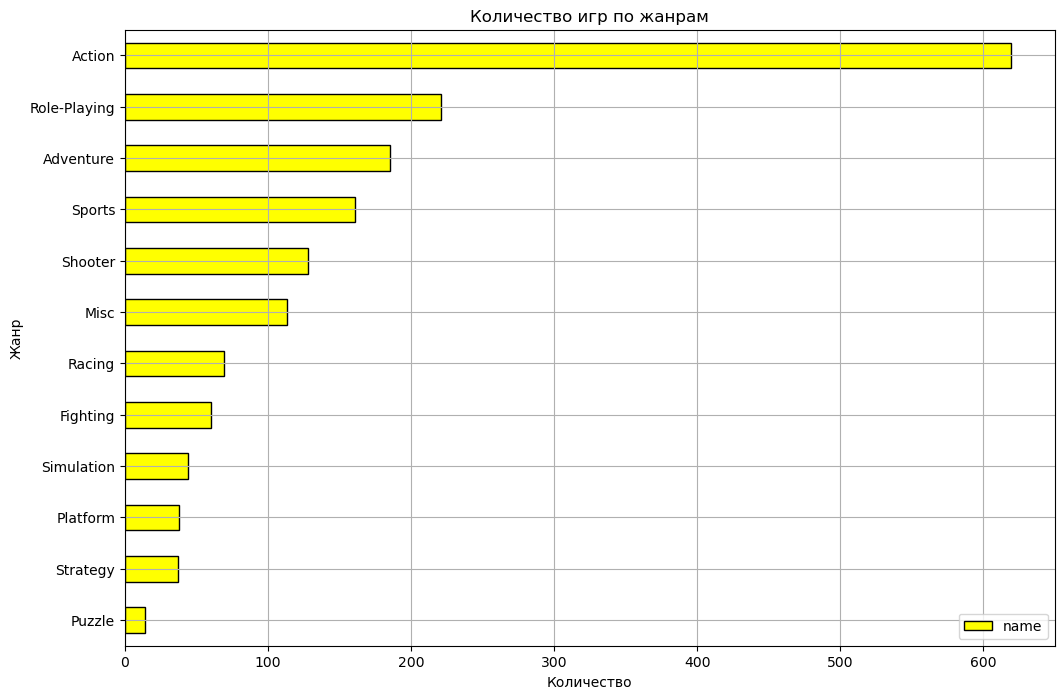

In [53]:
genre_counts = data_games_actual.pivot_table(index='genre', values='name', aggfunc='count').sort_values(by='name')


genre_counts.plot(kind='barh', color='yellow', edgecolor='black', figsize=(12, 8))
plt.title('Количество игр по жанрам')
plt.xlabel('Количество')
plt.ylabel('Жанр')
plt.grid(True)
plt.show()

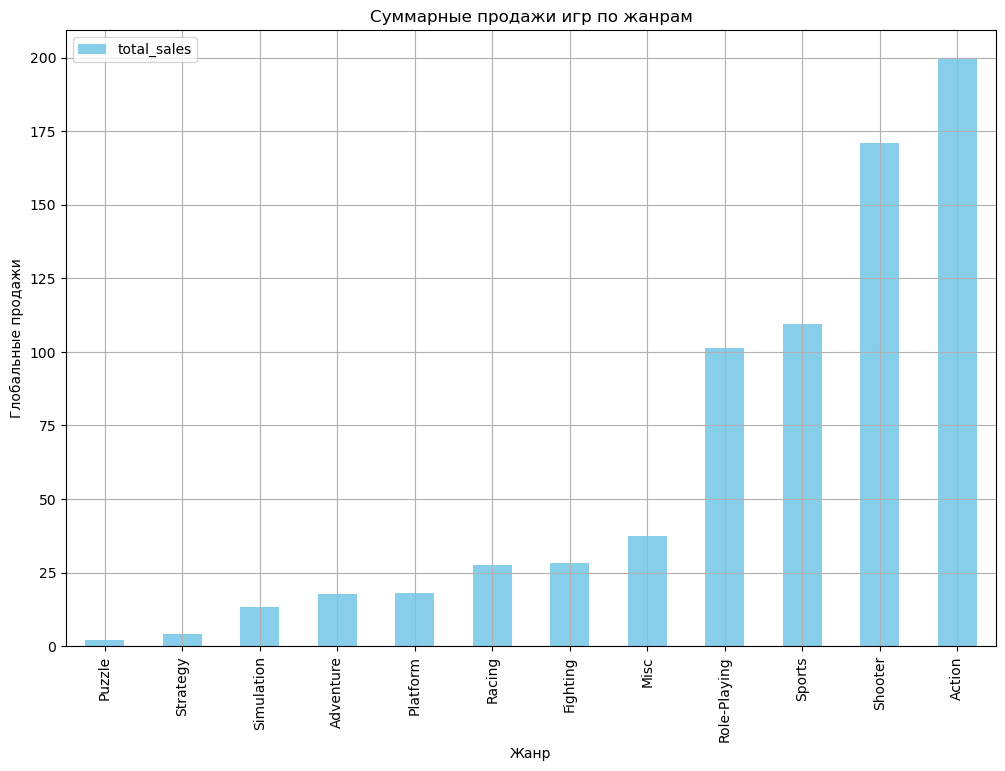

In [54]:
# Группируем данные по жанрам и суммируем продажи для каждого жанра
genre_sales = data_games_actual.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales')


genre_sales.plot(kind='bar', color='skyblue', figsize=(12, 8))
plt.title('Суммарные продажи игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Глобальные продажи')
plt.grid(True)
plt.show()

Жанр Action является абсолютным лидером по числу выпущенных игр и объему продаж, что неудивительно, учитывая его популярность и широкий круг аудитории. Однако, этот успех не приходит без своей цены: разработка игр в этом жанре обычно требует значительных инвестиций, как в смысле времени, так и финансов.


С другой стороны, жанр Platform отличается наименьшим количеством выпущенных игр. Это может быть связано с тем, что такие игры требуют особого внимания к дизайну уровней и игровой механике, также их популярность постепенно ушла после Mario.


В отношении жанра Strategy, его низкие объемы продаж могут быть объяснены тем, что эти игры часто ориентированы на узкую, но преданную аудиторию. Любители стратегий часто ценят глубину игрового процесса и тактические вызовы, и, следовательно, они могут быть менее склонны к массовой покупке игр этого жанра.

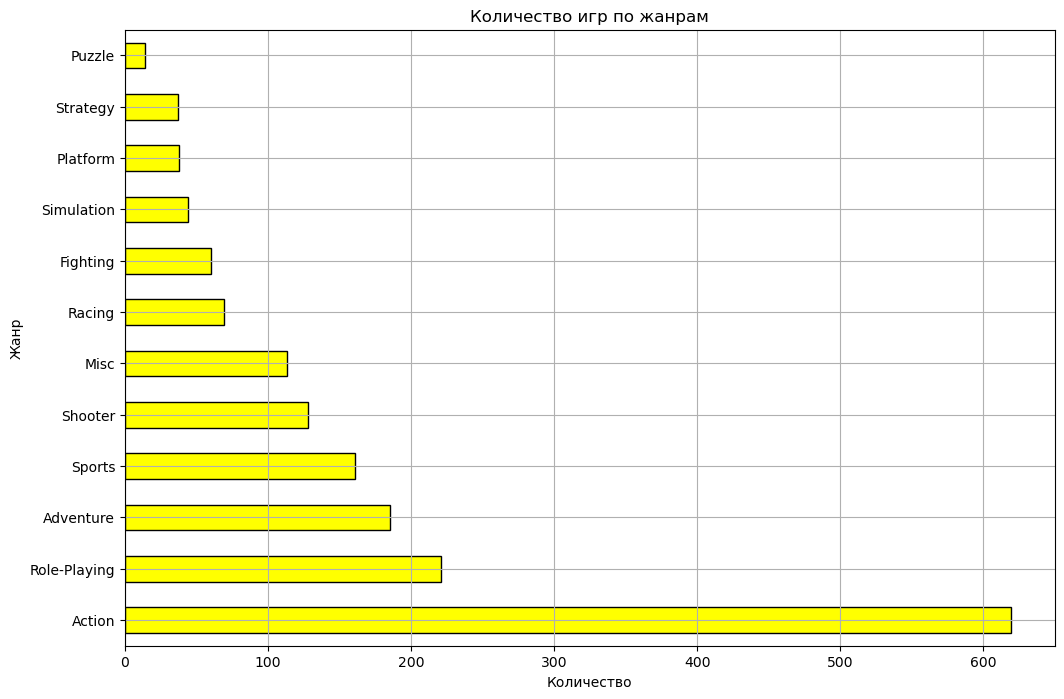

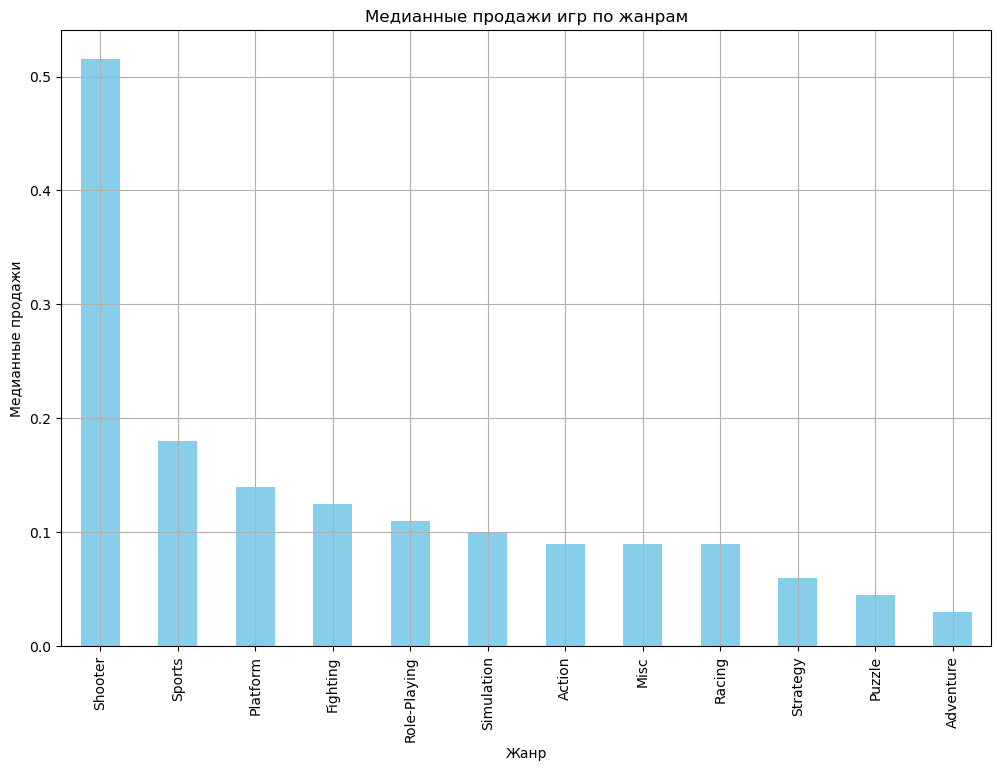

In [55]:
# Группируем данные по жанрам и подсчитываем количество релизов для каждого жанра
genre_counts = data_games_actual.groupby('genre').size().sort_values(ascending=False)

genre_counts.plot(kind='barh', color='yellow', edgecolor='black', figsize=(12, 8))
plt.title('Количество игр по жанрам')
plt.xlabel('Количество')
plt.ylabel('Жанр')
plt.grid(True)
plt.show()

# Группируем данные по жанрам и суммируем продажи для каждого жанра
genre_sales = data_games_actual.groupby('genre')['total_sales'].median().sort_values(ascending=False)

genre_sales.plot(kind='bar', color='skyblue', figsize=(12, 8))
plt.title('Медианные продажи игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Медианные продажи')
plt.grid(True)
plt.show()


Жанр Action имеет высокое количество выпущенных игр, что объясняется его широкой популярностью и привлекательностью для различных типов игроков. С другой стороны, низкое количество выпущенных игр в жанре Puzzle может быть связано с более узкой аудиторией, которая предпочитает этот жанр, а также с тем, что разработка головоломок требует дополнительного времени и усилий.


Жанр Shooter, хотя и имеет высокие медианные продажи, требует значительных инвестиций для разработки, что может быть препятствием для некоторых разработчиков. Жанр Adventure, хотя и предлагает глубокие и захватывающие сюжеты, может иметь более низкие объемы продаж из-за более узкой целевой аудитории, которая ценит глубокое повествование и интересные персонажи перед динамичным геймплеем.

**Промежуточный вывод по шагу 3**

В ходе проведения исследовательского анализа было сделано следующее:


1) Посмотрели, сколько игр выпускалось в разные годы.

- Из полученного графика мы увидели, что количество игр до 1991 года крайне мало, но затем мы видим резкий рост, поэтому нам не так важны данные за все периоды. Так как 1990-е годы были ознаменованы заметными инновациями в компьютерных играх. Основными достижениями называют переход от растровой графики к полностью полигональному 3D, снижение популярности аркадных игр и появление нескольких новых жанров - шутер от первого лица, стратегия в реальном времени и MMO. Также мы видим, что стремительное развитие продолжается до 2009 года, возможно, в этот период производители игр решили развиваться на рынке телефонных игр. Если рассамтривать некую игровую историю, то как раз 2009 год был ознаменован эрой магазинов приложений, вот к примеру игры, которые набрали огромную популярность: Doodle Jump и Angry Birds.


2) Проанализировали как менялись продажи по платформам.

- Из полученных графиков можем сделать вывод о том, что наибольшими продажами обладают PS2, X360, PS3, Wii, DS, PS, что вполне логично, потому что многие из них стали "легендарными" в геймерском комьюнити. Если рассамтривать продажи по годам, то видим, что самая долговечная платформа - это DS. Также видим, что пик продаж приходится где-то спустя 3-5 лет после выпуска платформы, затем он снижается, если смотреть на PS, то после выхода новой модели данной консоли происходит спад. Также можно заметить тенденцию, что в среднем новая платформа выходит каждые 5 лет. А срок её жизни составляет примерно 10 лет.


3) Выбрали актуальный период (2014 - 2016), так как эти данные помогут построить прогноз на 2017 год.

- При анализе периода с 2014 по 2016 год видим, что в топ 5 входят следующие платформы: PS4, XOne, 3DS, PS3, X360

- Также мы заметили, что безоговорочным лидером является PlayStation, в топ 5 вошли сразу две игровые консоли: PS4 (1 место), так как это одна из самых новых и технологичных консолей и PS3 (4 место), жизнь которой уже заканчивается. Также в топ 5 вошли две консоли от Xbox: XOne (2 место), которая является основным конкурентом для PS4, X360 (5 место), жизненный цикл которой тоже заканчивается как и у PS3. 3 место занимает 3DS, которая была выпущена ещё в 2011 году.


4) Построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Анализируя полученный график, были сделаны следующие выводы:

- Данные хаотичны, с большим количеством выбросов: "ящик с усами" показывает значительный разброс в продажах игр для различных платформ. Это указывает на то, что игровой рынок довольно динамичен и подвержен влиянию различных факторов, таких как популярность игр или рекламные кампании.

- Главные конкуренты: Playstation и Xbox выделяются на графике как основные конкуренты на игровом рынке. Они имеют сравнимые уровни продаж и, вероятно, являются основными выборами для игроков.

- Для крупных платформ, таких как Xbox (X360) и Playstation 4 (PS4), верхняя граница продаж находится примерно на уровне 1.7 миллиона. Это может указывать на примерный максимальный уровень коммерческого успеха для игр на этих платформах.

- Самая неприбыльная платформа - PSP. Это может указывать на её низкую популярность и невысокие коммерческие показатели.

- Медианное значение продаж для крупных платформ составляет около 0.2 миллиона. Это может быть полезной метрикой для прогнозирования ожидаемых продаж новых игр на этих платформах.

- Малые платформы, хотя и имеют меньший объем продаж, обычно характеризуются более стабильным распределением продаж и меньшим количеством выбросов. Это может сделать их менее рискованным выбором для разработчиков игр, но и менее привлекательным для крупных издателей.


5) Посмотрели как влияют на продажи внутри одной популярной платформы (выбор пал на X360) отзывы пользователей и критиков. Исходя из значений корреляции между отзывами пользователей и продажами (-0.138) и между отзывами критиков и продажами (0.525) для Xbox 360 (X360), можно сделать следующие выводы:


- Отзывы критиков имеют более сильную корреляцию с продажами, чем отзывы пользователей. Значение корреляции между отзывами критиков и продажами (0.525) гораздо выше, чем корреляция между отзывами пользователей и продажами (-0.138). Это может указывать на то, что мнение критиков о игре более существенно влияет на решение покупателей о покупке, чем мнение пользователей.

- Отзывы критиков имеют умеренно сильную корреляцию с продажами. Значение корреляции между отзывами критиков и продажами (0.525) говорит о том, что высокие оценки от критиков могут стимулировать продажи игр. Это подтверждает важность влияния мнения профессиональных экспертов на решение покупателей.

- Корреляция между отзывами пользователей и продажами (-0.138) остается невысокой и может свидетельствовать о более слабой связи между мнением пользователей и успешностью продаж. Возможно, другие факторы, такие как рекламные кампании или репутация разработчика, играют более значимую роль в привлечении пользователей к покупке игры.

- Рассмотрев и другие платформы мы увидили, что для таких платформ как: PS4, XOne, PS3 характерна такая же тенденция, как и для X360. Отзывы пользователей почти почти не влияют на продажи, а отзывы критиков, наоборот, оказывают более значимое влияние. Для платформ WiiU и 3DS как отзывы пользователей влияют на продажи, так и отзывы критиков. К примеру для платформы WiiU и пользовательские отзывы и отзывы критиков имеют почти одинаковое значение корреляции.


6) Рассмотрели как игры распределяются по жанрам.

- Жанр Action имеет высокое количество выпущенных игр, что объясняется его широкой популярностью и привлекательностью для различных типов игроков. С другой стороны, низкое количество выпущенных игр в жанре Puzzle может быть связано с более узкой аудиторией, которая предпочитает этот жанр, а также с тем, что разработка головоломок требует дополнительного времени и усилий.

- Жанр Shooter, хотя и имеет высокие медианные продажи, требует значительных инвестиций для разработки, что может быть препятствием для некоторых разработчиков. Жанр Adventure, хотя и предлагает глубокие и захватывающие сюжеты, может иметь более низкие объемы продаж из-за более узкой целевой аудитории, которая ценит глубокое повествование и интересные персонажи перед динамичным геймплеем.

#### Шаг 4. Портрет пользователя каждого региона

##### Самые популярные платформы (топ-5).

###### Создадим создадим сводные таблицы с платформами и их суммарными продажами 

In [60]:
def region_pivot(data, our_index, our_values, func):
    pivot_table = (data
                   .pivot_table(index=our_index, values=our_values, aggfunc=func)
                   .sort_values(by=our_values, ascending=False)
                   .head())
    return pivot_table


In [61]:
na_pivot = region_pivot(data_games_actual, 'platform', 'na_sales', 'sum')

In [62]:
eu_pivot = region_pivot(data_games_actual, 'platform', 'eu_sales', 'sum')

In [63]:
jp_pivot = region_pivot(data_games_actual, 'platform', 'jp_sales', 'sum')

###### Построим круговые диаграммы для каждого региона

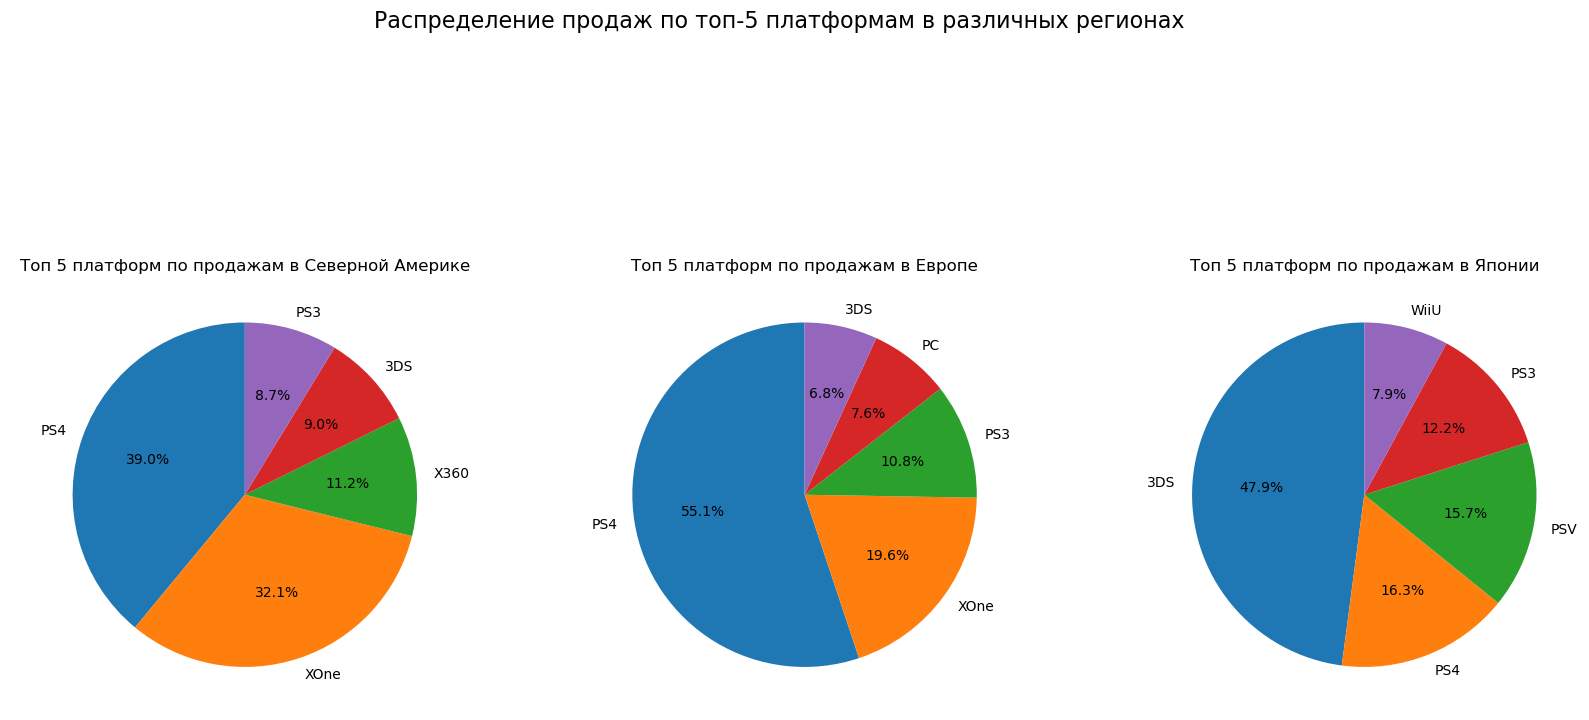

In [65]:
fig, axes = plt.subplots(1, len(regions), figsize=(20, 10))
plt.subplots_adjust(wspace=0.3)  # Устанавливаем горизонтальное расстояние между подграфиками

for ax, region, name in zip(axes, regions, region_name):
    region.plot(kind='pie', ax=ax, startangle=90, autopct='%1.1f%%', subplots=True, legend=None)
    ax.set_title(f'Топ 5 платформ по продажам в {name}')
    ax.set_ylabel(' ')

plt.suptitle('Распределение продаж по топ-5 платформам в различных регионах', fontsize=16)

plt.show()

Из полученных круговых диаграмм можем сделать следующие выводы:


1) В Северной Америке в топ 5 по продажам вошли следующие платформы: PS4, XOne, X360, 3DS, PS3. Среди данных мастадонтов лидирует X360 (на него приходится 39,0% продаж, если смотреть на топ 5), на последнем месте расположилась PS3 (доля от продаж 8,7%).


2) В Европе топ 5 составили PS4, XOne, PS3, PC, 3DS. Среди них лидирует PS4 (доля продаж, которой равна 55,1%), топ замыкает 3DS (доля сосатвлет 6,8%).


3) В Японии в лидеры по продажам выбились 3DS, PS4, PSV, PS3, WiiU. Первое место занял 3DS (доля равна 47,9%), а последнее место занимает плафторма WiiU (доля продаж равна 7,9%).  

##### Самые популярные жанры (топ-5).

In [66]:
na_genre_pivot = na_genre_pivot = region_pivot(data_games_actual.query('na_sales > 0'), 'genre', 'name', 'count')

In [67]:
eu_genre_pivot = region_pivot(data_games_actual.query('eu_sales > 0'), 'genre', 'name', 'count')

In [68]:
jp_genre_pivot = region_pivot(data_games_actual.query('jp_sales > 0'), 'genre', 'name', 'count')

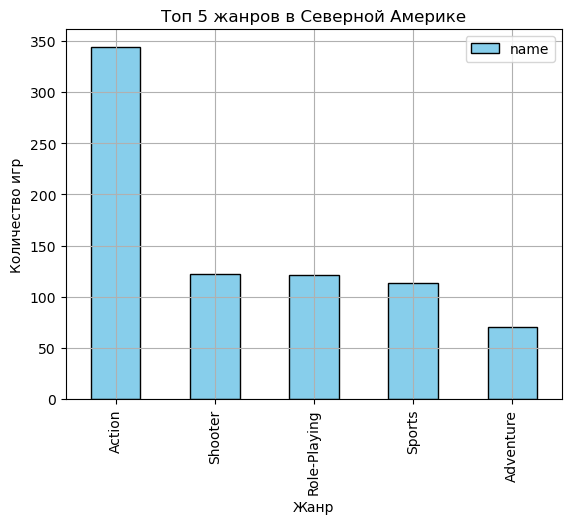

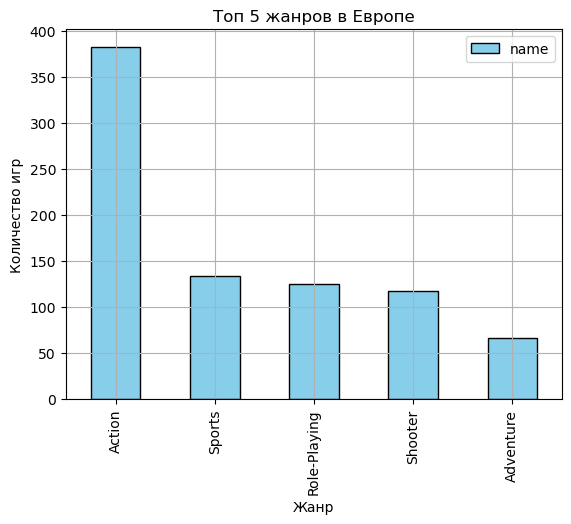

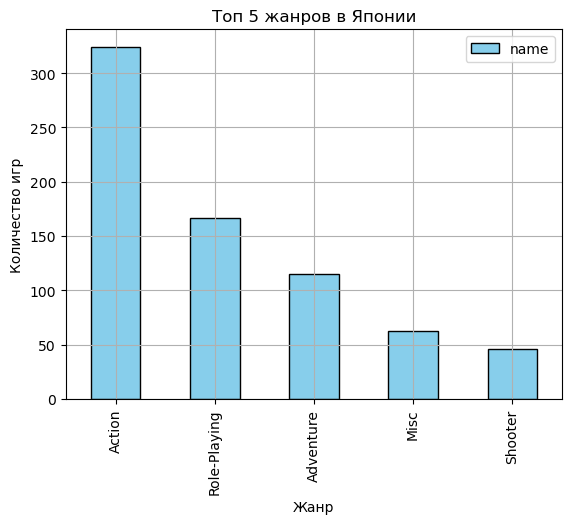

In [69]:
region_genre_data = {
    'Северной Америке': na_genre_pivot,
    'Европе': eu_genre_pivot,
    'Японии': jp_genre_pivot
}

# Построение графиков для каждого региона
for region_name, genre_pivot in region_genre_data.items():
    genre_pivot.plot(kind='bar', color='skyblue', edgecolor='black', grid=True)
    plt.title(f'Топ 5 жанров в {region_name}')
    plt.xlabel('Жанр')
    plt.ylabel('Количество игр')
    plt.show()

На основе представленных графиков можем сделать следующие выводы:


1) Северная Америка и Европа: В этих регионах топ-5 жанров включают Action, Sports, Adventure, Shooter и Role-Playing. Также в этих регионах мы видим, что жанр Action является абсолютным лидером, места со 2 по 4  примерно равны между собой.


2) Япония: В Японии топ-5 жанров отличается некоторыми особенностями. Здесь также в топе присутствуют Action, Role-Playing, Shooter и Adventure, но кроме того, в топ входит Misc. Первое место занимает Action, а последнее место в топе принадлежит жанру Shooter.

##### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [70]:
na_esrb = region_pivot(data_games_actual, 'rating', 'na_sales', 'sum')

In [71]:
eu_esrb = region_pivot(data_games_actual, 'rating', 'eu_sales', 'sum')

In [72]:
jp_esrb = region_pivot(data_games_actual, 'rating', 'jp_sales', 'sum')

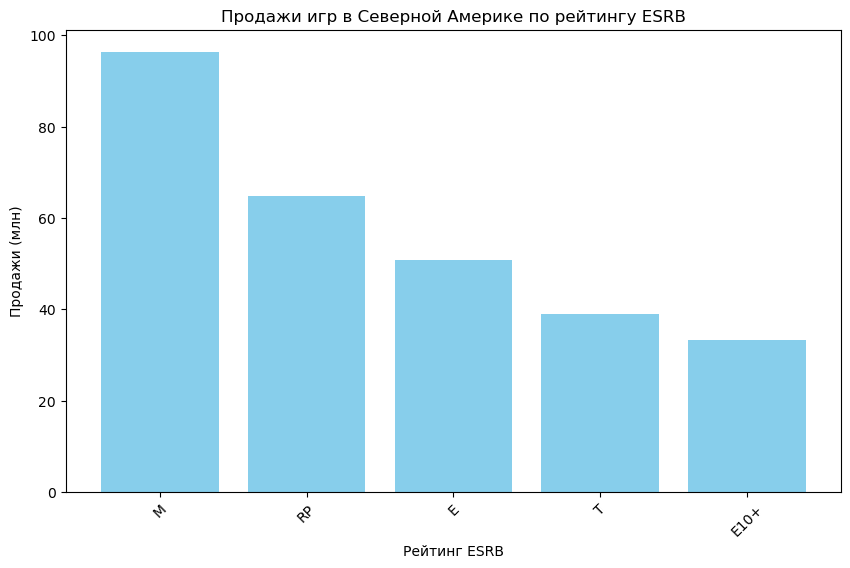

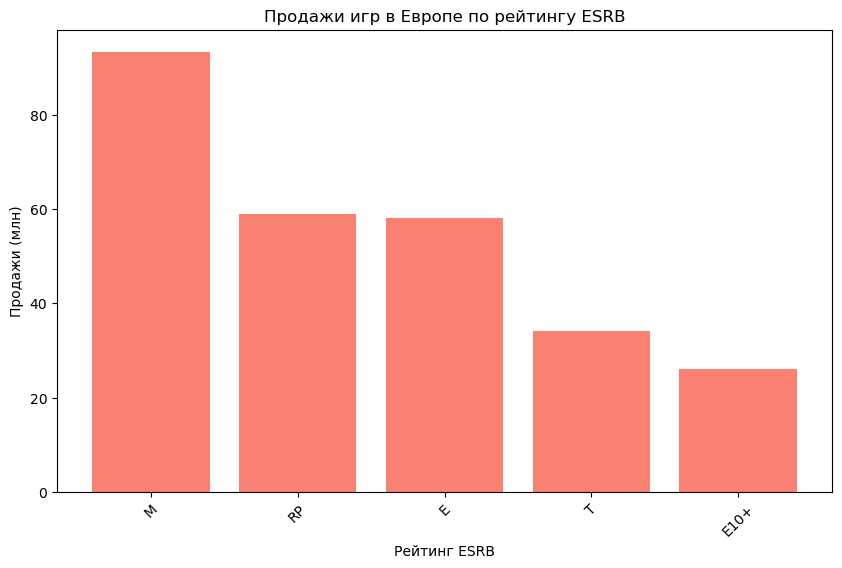

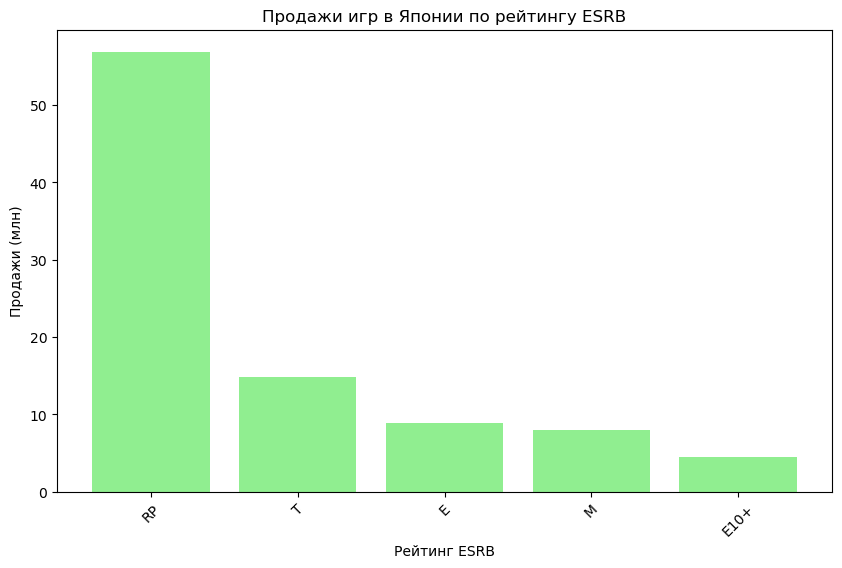

In [73]:
# Строим столбчатую диаграмму для Северной Америки
plt.figure(figsize=(10, 6))
plt.bar(na_esrb.index, na_esrb['na_sales'], color='skyblue')
plt.title('Продажи игр в Северной Америке по рейтингу ESRB')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи (млн)')
plt.xticks(rotation=45)
plt.show()

# Строим столбчатую диаграмму для Европы
plt.figure(figsize=(10, 6))
plt.bar(eu_esrb.index, eu_esrb['eu_sales'], color='salmon')
plt.title('Продажи игр в Европе по рейтингу ESRB')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи (млн)')
plt.xticks(rotation=45)
plt.show()

# Строим столбчатую диаграмму для Японии
plt.figure(figsize=(10, 6))
plt.bar(jp_esrb.index, jp_esrb['jp_sales'], color='lightgreen')
plt.title('Продажи игр в Японии по рейтингу ESRB')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи (млн)')
plt.xticks(rotation=45)
plt.show()

В Северной Америке наибольшими продажами обладают игры с рейтингом **M** - «Подросткам». Топ 5 замыкает **E+10** - что означает «Для всех от 10 лет и старше». 

В Европе также наибольшими продажами обладают игры с рейтингом **M** - «Подросткам», на последнем месте **E+10** - что означает «Для всех от 10 лет и старше».

В Японии на первом месте по продажам игры без рейтинга так как там используют в основном рейтинг CERO. Последнее же место занимают игры с рейтингом **E+10**.


В Японии используют рейтинг CERO (CERO) — японская некоммерческая организация, занимающаяся присуждением рейтингов компьютерным играм и программному обеспечению для их последующей продажи на территории Японии. Рейтинг, в частности, указывает потребителю на возрастную группу, категорию людей, которые могут использовать данный продукт.

**Промежуточный вывод по шагу 4**

На этом шаге мы составляли протрет для пользователя каждого региона.


1) Сначала рассмотрели топ 5 платформ по продажам по каждому региону.

- В Северной Америке в топ 5 по продажам вошли следующие платформы: PS4, XOne, X360, 3DS, PS3. Среди данных мастадонтов лидирует X360 (на него приходится 39,0% продаж, если смотреть на топ 5), на последнем месте расположилась PS3 (доля от продаж 8,7%).

- В Европе топ 5 составили PS4, XOne, PS3, PC, 3DS. Среди них лидирует PS4 (доля продаж, которой равна 55,1%), топ замыкает 3DS (доля сосатвлет 6,8%).

- В Японии в лидеры по продажам выбились 3DS, PS4, PSV, PS3, WiiU. Первое место занял 3DS (доля равна 47,9%), а последнее место занимает плафторма WiiU (доля продаж равна 7,9%).


2) Самые популярные жанры по каждому региону

- Северная Америка и Европа: В этих регионах топ-5 жанров включают Action, Sports, Adventure, Shooter и Role-Playing. Также в этих регионах мы видим, что жанр Action является абсолютным лидером, места со 2 по 4 примерно равны между собой.

- Япония: В Японии топ-5 жанров отличается некоторыми особенностями. Здесь также в топе присутствуют Action, Role-Playing, Shooter и Adventure, но кроме того, в топ входит Misc. Первое место занимает Action, а последнее место в топе принадлежит жанру Shooter.


3)  Посмотрели влияние рейтинга ESRB на продажи в отдельном регионе

- В Северной Америке наибольшими продажами обладают игры с рейтингом M - «Подросткам». Топ 5 замыкает E+10 - что означает «Для всех от 10 лет и старше».

- В Европе также наибольшими продажами обладают игры с рейтингом M - «Подросткам», на последнем месте E+10 - что означает «Для всех от 10 лет и старше».

- В Японии на первом месте по продажам игры без рейтинга так как там используют в основном рейтинг CERO. Последнее же место занимают игры с рейтингом E+10. (CERO) — японская некоммерческая организация, занимающаяся присуждением рейтингов компьютерным играм и программному обеспечению для их последующей продажи на территории Японии. Рейтинг, в частности, указывает потребителю на возрастную группу, категорию людей, которые могут использовать данный продукт.

#### Шаг 5. Проверка гипотез

1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

- H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- H1 - Средние пользовательские рейтинги платформ Xbox One и PC разные

In [74]:
data_games_actual['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [75]:
xone_data = data_games_actual.query('platform == "XOne" and user_score.notna()')['user_score']

In [76]:
pc_data = data_games_actual.query('platform == "PC" and user_score.notna()')['user_score']

In [77]:
alpha = 0.05

results_hyp1 = st.ttest_ind(xone_data, pc_data, equal_var=False)

print('p-значение:', results_hyp1.pvalue)

if results_hyp1.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу') 
else: 
    print('Не отвергаем нулевую гипотезу')


p-значение: 0.11601398086668832
Не отвергаем нулевую гипотезу


При заданном уровне значимости 0.05 и полученном p-значении 0.116, мы не можем отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Это означает, что на основе имеющихся данных у нас нет статистически значимых доказательств в пользу различий в средних пользовательских рейтингах этих платформ.

2) Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


- H0 - Средние пользовательские рейтинги жанров Action и Sports равны

- H1 - Средние пользовательские рейтинги жанров Action и Sports разные

In [78]:
action_data = data_games_actual.query('genre == "Action" and user_score.notna()')['user_score']

In [79]:
sports_data = data_games_actual.query('genre == "Sports" and user_score.notna()')['user_score']

In [80]:
alpha = 0.05

results_hyp2 = st.ttest_ind(action_data, sports_data, equal_var=False)

print('p-значение:', results_hyp2.pvalue)

if results_hyp2.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу') 
else: 
    print('Не отвергаем нулевую гипотезу')

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги для жанров Action и Sports различаются.

Мы использовали уровень значимости alpha, равный 0.05, для принятия решения о том, следует ли отвергать нулевую гипотезу. Поскольку полученное p-значение значительно меньше выбранного нами уровня значимости, мы отвергаем нулевую гипотезу о равенстве средних пользовательских рейтингов для жанров Action и Sports. Это означает, что существует статистически значимое различие в средних пользовательских рейтингах между этими двумя жанрами.

**Промежуточный вывод по шагу 5**

На этом шаге мы проверили следующие гипотезы гипотезы:

1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

- H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- H1 - Средние пользовательские рейтинги платформ Xbox One и PC разные

- При заданном уровне значимости 0.05 и полученном p-значении 0.116, мы не можем отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Это означает, что на основе имеющихся данных у нас нет статистически значимых доказательств в пользу различий в средних пользовательских рейтингах этих платформ.


2) Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

- H0 - Средние пользовательские рейтинги жанров Action и Sports равны

- H1 - Средние пользовательские рейтинги жанров Action и Sports разные

- Средние пользовательские рейтинги для жанров Action и Sports различаются.

- Мы использовали уровень значимости alpha, равный 0.05, для принятия решения о том, следует ли отвергать нулевую гипотезу. Поскольку полученное p-значение значительно меньше выбранного нами уровня значимости, мы отвергаем нулевую гипотезу о равенстве средних пользовательских рейтингов для жанров Action и Sports. Это означает, что существует статистически значимое различие в средних пользовательских рейтингах между этими двумя жанрами.


Для проверки этих гипотез мы использовали двусторонний t-тест для независимых выборок (ttest_ind) из библиотеки scipy.stats. Этот выбор обоснован тем, что нам нужно сравнить средние значения двух групп данных (платформы Xbox One и PC для первой гипотезы, жанры Action и Sports для второй) и определить, различаются ли они статистически значимо. Кроме того, мы использовали параметр equal_var=False, предполагая, что дисперсии обеих выборок могут быть различными.

Критерий t-теста является подходящим для нашего исследования, так как мы работаете с количественными данными (пользовательскими рейтингами), и наша цель - сравнить средние значения между двумя группами.

# Общий вывод

В предоставленном нам датафрейме, который содержит информацию о играх с 1980 по 2016 год, есть 16715 записей. В данных присутствуют пропуски, особенно в столбцах Critic_Score, User_Score, Rating. Также стоит обратить внимание на неверные типы данных у столбцов year_of_release, user_score, и некоррктное название у всех столбцов. Далее рассмотрим каждый шаг работы.

1) Во время предобработки данных было сделано следующее:

- Изменены названия столбцов, приведя их к нижнему регистру для удобства работы.

- Обработаны пропуски:

Удалены пропуски в столбцах "name" и "genre", так как они относятся к одним и тем же строкам, и их количество незначительно.

Удалены пропуски в столбце "year_of_release", так как их доля невелика (1.61%) и наблюдается определенная закономерность в данных.

Пропуски в столбце "user_score" заменены на NaN, так как заполнение средним или медианой могло бы исказить общую картину данных. Также заменены значения "tbd" на NaN.

Пропуски в столбце "critic_score" оставлены без изменений для сохранения возможности проведения дальнейших вычислительных операций.

В столбце "rating" обозначения "RP" заполнены в соответствии с рейтингом ESRB.

- Выполнено преобразование типов данных для столбцов "year_of_release" (в int) и "user_score" (в float).

- Добавлен столбец с суммарными продажами по всем регионам путем сложения данных из соответствующих столбцов.

- Проведена проверка на явные дубликаты, которых не обнаружено в датафрейме, но были найдены неявные дубликаты (по названию, платформе и году релиза одновременно).


2) В ходе исследовательского анализа мы выявили следующее:


- Тенденции по выпуску игр по годам:

Резкий рост выпуска игр начинается с начала 1990-х годов, ознаменованный инновациями в компьютерных играх. В 2009 году началась эра магазинов приложений, что существенно изменило рынок.


- Изменения продаж по платформам:

PS2, X360, PS3, Wii и DS - одни из наиболее успешных платформ, хотя их популярность угасает со временем.
Новые платформы, такие как PS4 и XOne, начинают набирать популярность и вытеснять старые.


- Выбор актуального периода для прогнозирования (2014 - 2016 гг.):

Важные платформы в этом периоде: PS4, XOne, 3DS, PS3, X360. Также мы заметили, что безоговорочным лидером является PlayStation, в топ 5 вошли сразу две игровые консоли: PS4 (1 место), так как это одна из самых новых и технологичных консолей и PS3 (4 место), жизнь которой уже заканчивается. Также в топ 5 вошли две консоли от Xbox: XOne (2 место), которая является основным конкурентом для PS4, X360 (5 место), жизненный цикл которой тоже заканчивается как и у PS3. 3 место занимает 3DS, которая была выпущена ещё в 2011 году. 

- Анализ глобальных продаж игр и их распределение по платформам:

Выбросы и разброс в продажах указывают на динамичность игрового рынка. Playstation и Xbox выделяются как основные конкуренты, имеющие сравнимые уровни продаж. PSP является наименее прибыльной платформой.

- Влияние отзывов на продажи:

Отзывы критиков оказывают большее влияние на продажи, чем отзывы пользователей. Корреляция между отзывами и продажами не очень сильна, и на продажи могут влиять и другие факторы.


- Распределение игр по жанрам:

Жанр Action имеет высокое количество выпущенных игр, что объясняется его широкой популярностью и привлекательностью для различных типов игроков. С другой стороны, низкое количество выпущенных игр в жанре Puzzle может быть связано с более узкой аудиторией.

Жанр Shooter, хотя и имеет высокие медианные продажи, требует значительных инвестиций для разработки, что может быть препятствием для некоторых разработчиков. Жанр Adventure, хотя и предлагает глубокие и захватывающие сюжеты, может иметь более низкие объемы продаж из-за более узкой целевой аудитории.


3) В ходе составления портрета пользователя каждого региона удалось выявить следующее:

- Северная Америка:
Пользователи из Северной Америки предпочитают игры на платформе PS4, с акцентом на экшн, шутеры и ролевые игры. Они также предпочитают игры с рейтингом M («Для подростков»), что подразумевает 

- Европа:
Пользователи из Европы также предпочитают PS4, а также игры в жанрах экшн, спорт и ролевые игры. Они проявляют интерес к играм с рейтингом M.

- Япония:
Пользователи из Японии предпочитают игры на платформе 3DS, с уклоном в экшн и ролевые игры. Они также проявляют интерес к приключенческим и спортивным играм. Интересно, что игры с рейтингом E+10 не пользуются большим спросом, а игры без рейтинга (вероятно, у них используется свой рейтинг CERO) наиболее популярны, что может указывать на значительную доверчивость к местным выпускам игр и культурным особенностям региона.


4) В ходе проверки гипотез нам удалось выявить следующее:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

При заданном уровне значимости 0.05 и полученном p-значении 0.116, мы не можем отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Это означает, что на основе имеющихся данных у нас нет статистически значимых доказательств в пользу различий в средних пользовательских рейтингах этих платформ.

- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Средние пользовательские рейтинги для жанров Action и Sports различаются. Мы использовали уровень значимости alpha, равный 0.05, для принятия решения о том, следует ли отвергать нулевую гипотезу. Поскольку полученное p-значение значительно меньше выбранного нами уровня значимости, мы отвергаем нулевую гипотезу о равенстве средних пользовательских рейтингов для жанров Action и Sports. Это означает, что существует статистически значимое различие в средних пользовательских рейтингах между этими двумя жанрами.

В заключении хотелось бы поговорить о некоторых закономерностях:

- Популярные платформы: В разные периоды времени различные игровые платформы пользуются популярностью. Например, PS2, X360, PS3, Wii и DS были наиболее успешными в прошлом, в то время как PS4 и XOne набирают обороты в последние годы. Это свидетельствует о том, что рынок игровых платформ динамичен и подвержен изменениям с течением времени.

- Жанровые предпочтения: Жанры игр также имеют свои предпочтения среди игроков. Например, жанр Action обычно имеет высокое количество выпущенных игр и высокие продажи, в то время как жанр Puzzle может иметь более узкую аудиторию и меньшие продажи.

- Отзывы критиков и пользователей: Отзывы критиков кажутся имеют большее влияние на продажи игр, чем отзывы пользователей. Однако, корреляция между отзывами и продажами не всегда сильна, что может указывать на влияние других факторов на успешность игры.

- Рейтинг ESRB: Рейтинг ESRB также может играть важную роль в предпочтениях игроков. Например, игры с рейтингом "M" (для подростков) могут быть более популярны в Северной Америке и Европе, в то время как в Японии игры без рейтинга или с меньшими возрастными ограничениями могут быть более популярны.

- Географические особенности: Предпочтения игровых платформ, жанров и рейтингов могут различаться в разных регионах. Например, PS4 может быть популярнее в Северной Америке и Европе, в то время как 3DS может быть популярнее в Японии. Такие различия могут быть связаны с культурными особенностями и предпочтениями потребителей в разных частях мира.